# Multiforest optimization notebook Maximum Multifunctionallity

Above the code cells, there are short instructions how the users can modify the codes in the cells. If there are no instructions, no changes should be needed for the cell by default.

A detailed description is provided in the README.md.

## Basic definitions
Simulated forest data - climate scenario

In [3]:
RCP = "RCP45"

## Read the data

In [4]:
import wget
import os
import numpy as np
import sys

In [6]:
import multiFunctionalOptimization_MF as MFO

In [7]:
from importlib import reload
reload(MFO)

<module 'multiFunctionalOptimization_MF' from 'E:\\MultiForest\\Optimization\\multiforestOptimizationNotebook\\multiFunctionalOptimization_MF.py'>

In [8]:
mfo = MFO.MultiFunctionalOptimization()

'Using CLP'

In [9]:
filename = "rslt_"+RCP+"_Bavaria_Germany_pause_2_V1.zip"
filename

'rslt_RCP45_Bavaria_Germany_pause_2_V1.zip'

### Import data

In [10]:
if not filename in os.listdir("."):
    wget.download("https://syncandshare.lrz.de/download/MktBZ3hBbzR2UnhwcWk4YXYxcVFj/Data/"+filename)

In [11]:
%%time
mfo.readData(filename,
             sampleRatio=0.2 #If no sample ratio given, the ratio is assumed to be 1
            ) 

C:\Users\torano\anaconda3\lib\site-packages\pandas\core\generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['regime', 'ecoregion', 'region', 'NUTS2'], dtype='object')]

  encoding=encoding,


'sample size 745/3725(20%)'

Wall time: 22 s


In [13]:
mfo.data.columns

Index(['id', 'regime', 'year', 'ecoregion', 'V_strat', 'V_strat_reg',
       'Ve_strat', 'Vm_strat', 'iV_strat', 'pct_coni', 'pct_reg_coni',
       'pct_deci', 'pct_reg_deci', 'spruce_pct', 'spruce_reg_pct', 'fir_pct',
       'fir_reg_pct', 'pine_pct', 'pine_reg_pct', 'larch_pct', 'larch_reg_pct',
       'beech_pct', 'beech_reg_pct', 'oak_pct', 'oak_reg_pct',
       'douglasfir_pct', 'douglasfir_reg_pct', 'hardbrl_pct',
       'hardbrl_reg_pct', 'softbrl_pct', 'softbrl_reg_pct', 'spi', 'spi_reg',
       'maxh', 'maxh_reg', 'spint', 'freq_h_0_50', 'freq_h_50_80',
       'freq_h_80_100', 'cntlayers', 'shan_species', 'shan_species_reg',
       'shan_height', 'volHa_dbhGR10', 'volHa_dbhGR20', 'volHa_dbhGR30',
       'volHa_dbhGR40', 'volHa_dbhGR50', 'volHa_dbhGR60', 'volHa_dead_dbhGR30',
       'volHa_dead_dbhGR40', 'volHa_dead_dbhGR50', 'volHa_dead_dbhGR60',
       'sawntimber', 'industrywood', 'yieldloss', 'remaininstand',
       'represented_area_by_NFIplot', 'region', 'NUTS2', 'clear_c

## Create new columns

In [15]:
mfo.data["HarvestedVolume"] = (mfo.data["Ve_strat"].values)*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
mfo.data["DeadVolume"] = (mfo.data["Vm_strat"].values)*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
mfo.data["CarbonBalance"] = (mfo.data["BalanceCarbonTotalYear"].values)*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
mfo.data["AnnualIncrement"] = mfo.data["iV_strat"].values*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
mfo.data["standingVolume"] = mfo.data["V_strat"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
mfo.data["CarbonSeqTot"] =mfo.data["CarbonBalance"].values*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
mfo.data["CrownCoverage"] =mfo.data["covered_area_per"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
mfo.data["energyProds"] = mfo.data["CFsawlogsToEnergy"].values*mfo.data["represented_area_by_NFIplot"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
mfo.data["inverseRisk"]= mfo.data["stormBBRisk"].values

C:\Users\torano\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
import numpy as np

In [25]:
mfo.data[mfo.regimesEnu].value_counts()

CCF_STATE        14900
BAU_0            14900
CCF_P3           14900
BAU_0_p1         14900
BAU_RR_p2        14900
BAU_RR_p1        14900
CCF_P1           14900
BAU_FS1          14900
BAU_1            14900
CCF_P2           14900
NOT              14900
CCF_P3_p1        14900
BAU_RR           14900
BAU_0_p2         14900
CCF_P3_p2        14900
initial_state      745
Name: regime, dtype: int64

In [26]:
mfo.finalizeData(initialRegime="initial_state")

In [27]:
mfo.initialData.head()

,,,ecoregion,V_strat,V_strat_reg,Ve_strat,Vm_strat,iV_strat,pct_coni,pct_reg_coni,pct_deci,pct_reg_deci,...,fuelwood,HarvestedVolume,DeadVolume,CarbonBalance,AnnualIncrement,standingVolume,CarbonSeqTot,CrownCoverage,inverseRisk,energyProds
id,year,regime,,,,,,,,,,,,,,,,,,,,,
6,2012,initial_state,9.6.2,138.631058,0.0,0.0,0.0,138.631058,36.0,0.0,64.0,0.0,...,0.0,0.0,0.0,0.0,106253.014862,138.631058,0.0,98.37,0.120498,0.0
10,2012,initial_state,9.15.5,228.104820,0.0,0.0,0.0,228.104820,7.0,0.0,93.0,0.0,...,0.0,0.0,0.0,0.0,87414.844706,228.104820,0.0,99.39,0.106034,0.0
14,2012,initial_state,9.5.2,182.529020,0.0,0.0,0.0,182.529020,5.0,0.0,95.0,0.0,...,0.0,0.0,0.0,0.0,69949.183714,182.529020,0.0,83.60,0.105086,0.0
18,2012,initial_state,9.5.8,395.745146,0.0,0.0,0.0,395.745146,28.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,303316.698618,395.745146,0.0,99.09,0.093223,0.0
20,2012,initial_state,9.6.3,185.863275,0.0,0.0,0.0,185.863275,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,71226.944475,185.863275,0.0,92.31,0.097445,0.0


In [28]:
mfo.data.head()

ecoregion     V_strat  V_strat_reg  Ve_strat   Vm_strat  \
id year regime                                                             
6  2017 BAU_0        9.6.2  188.290229     1.041906       0.0  25.105016   
        BAU_0_p1     9.6.2  186.253553     0.992174       0.0  27.230879   
        BAU_0_p2     9.6.2  186.253553     0.992174       0.0  27.230879   
        BAU_1        9.6.2  188.165782     0.854836       0.0  25.228368   
        BAU_FS1      9.6.2  187.641704     0.928608       0.0  25.301842   

                   iV_strat  pct_coni  pct_reg_coni  pct_deci  pct_reg_deci  \
id year regime                                                                
6  2017 BAU_0     74.764187      28.0          39.0      72.0          61.0   
        BAU_0_p1  74.853373      28.0          36.0      72.0          64.0   
        BAU_0_p2  74.853373      28.0          36.0      72.0          64.0   
        BAU_1     74.763092      27.0          29.0      73.0          71.0   
        BAU_FS1   74.312488      28.0          39.0      72.0          61.0   

                  ...  Relative_RandA.ASP3.DensityIntensity  \
id year regime    ...                                         
6  2017 BAU_0     ...                              0.001313   
        BAU_0_p1  ...                              0.001309   
        BAU_0_p2  ...                              0.001309   
        BAU_1     ...                              0.001313   
        BAU_FS1   ...                              0.001313   

                  Relative_RecreationAndAesthetics  Relative_CSagbLivingTotal  \
id year regime                                                                  
6  2017 BAU_0                             0.001295                   0.000695   
        BAU_0_p1                          0.001273                   0.000688   
        BAU_0_p2                          0.001273                   0.000688   
        BAU_1                             0.001293                   0.000695   
        BAU_FS1                           0.001294                   0.000693   

                  Relative_CSbgbLivingTotal  Relative_covered_area_per  \
id year regime                                                           
6  2017 BAU_0                      0.000747                   0.001970   
        BAU_0_p1                   0.000738                   0.001961   
        BAU_0_p2                   0.000738                   0.001961   
        BAU_1                      0.000748                   0.001967   
        BAU_FS1                    0.000744                   0.001966   

                  Relative_relative_Volume  Relative_AnnualIncrement  \
id year regime                                                         
6  2017 BAU_0                     0.001342                  0.000263   
        BAU_0_p1                  0.001342                  0.000264   
        BAU_0_p2                  0.001342                  0.000264   
        BAU_1                     0.001342                  0.000263   
        BAU_FS1                   0.001342                  0.000262   

                  Relative_standingVolume  Relative_CrownCoverage  \
id year regime                                                      
6  2017 BAU_0                    0.000659                0.001970   
        BAU_0_p1                 0.000652                0.001961   
        BAU_0_p2                 0.000652                0.001961   
        BAU_1                    0.000659                0.001967   
        BAU_FS1                  0.000657                0.001966   

                  Relative_inverseRisk  
id year regime                          
6  2017 BAU_0                 0.000429  
        BAU_0_p1              0.000429  
        BAU_0_p2              0.000429  
        BAU_1                 0.000413  
        BAU_FS1               0.000429  

[5 rows x 143 columns]

### Define the objectives

### Objectives

In [29]:
wood_production  = {
    "HarvestedVolume": ["Sum of extracted volume (m3/ha)","HarvestedVolume",
                        "max","average","sum"],
    "AnnualIncrement": ["Annual increment of standing volume (m3/ha/year) (4)","AnnualIncrement",
                        "max","average","sum"]
}

In [30]:
bioenergy  = {
    "energyproducts": ["remaning products for energy use", "energyProds",
                        "max","average","sum"]
}

In [31]:
biodiversity  = {                      
    "Sum_Deadwood_V": ["Deadwood volume (m3)", "DeadVolume",
                      "max","average","sum"], 
    "Biodiversity": ["Biodiversity fuzzy indicator ", "Biodiversity", 
                         "max", "min", "areaWeightedAverage"]
}

In [32]:
climate_regulation   = {
    "totalCarbonBalance" : ["carbon balance must be constant or increase", "CarbonSeqTot",
                         "max", "min", "sum"]
}

In [33]:
recreation = {
     "RecreationAsth" : ["Recreation and Esthetics", "RecreationAndAesthetics",
                       "max", "average", "areaWeightedAverage"]
}

In [34]:
resilience = {

    "RiskStormBB" :["Risk of storms and Bark Beetel", "inverseRisk", 
                   "min", "average","areaWeightedAverage"]
}

In [35]:
water = {
    
     "CrownCoverage":["Mean Crown coverage","CrownCoverage",
                       "max", "minYearlyIncrease", "areaWeightedAverage"],
     "CteStandingVolume" : ["Standing volume must be maintained ct.", "Relative_standingVolume",
                             "max", "minYearlyIncrease", "areaWeightedAverage"]
}

In [36]:
objectives = {
    **wood_production,
    **bioenergy,
    **biodiversity,
    **climate_regulation,
    **recreation,
    **resilience,
    **water
}


In [37]:
objectives

{'HarvestedVolume': ['Sum of extracted volume (m3/ha)',
  'HarvestedVolume',
  'max',
  'average',
  'sum'],
 'AnnualIncrement': ['Annual increment of standing volume (m3/ha/year) (4)',
  'AnnualIncrement',
  'max',
  'average',
  'sum'],
 'energyproducts': ['remaning products for energy use',
  'energyProds',
  'max',
  'average',
  'sum'],
 'Sum_Deadwood_V': ['Deadwood volume (m3)',
  'DeadVolume',
  'max',
  'average',
  'sum'],
 'Biodiversity': ['Biodiversity fuzzy indicator ',
  'Biodiversity',
  'max',
  'min',
  'areaWeightedAverage'],
 'totalCarbonBalance': ['carbon balance must be constant or increase',
  'CarbonSeqTot',
  'max',
  'min',
  'sum'],
 'RecreationAsth': ['Recreation and Esthetics',
  'RecreationAndAesthetics',
  'max',
  'average',
  'areaWeightedAverage'],
 'RiskStormBB': ['Risk of storms and Bark Beetel',
  'inverseRisk',
  'min',
  'average',
  'areaWeightedAverage'],
 'CrownCoverage': ['Mean Crown coverage',
  'CrownCoverage',
  'max',
  'minYearlyIncrease',


In [38]:
len(objectives)

10

In [39]:
mfo.defineObjectives(objectives)

'Defining objectives'

'Aggregating stand wise'

100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


'Aggregating year wise'

100%|██████████| 10/10 [00:00<00:00, 1432.53it/s]


'Objectives added'

## Calculate objective ranges

You can run the following function twice to improve ranges accuracy.

Especially, if some objectives get as lowerbounds 0:s, then it makes sense to reoptimize

In [40]:

%%time
mfo.calculateObjectiveRanges(debug=True)

'Calculating objective ranges'

  0%|          | 0/10 [00:00<?, ?it/s]

'Optimizing for Sum of extracted volume (m3/ha)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

195038248.78873768

'Annual increment of standing volume (m3/ha/year) (4)'

187586166.24372116

'remaning products for energy use'

263217.35077357513

'Deadwood volume (m3)'

24540876.410582695

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

-21574744299.401535

'Recreation and Esthetics'

0.36656970559807717

'Risk of storms and Bark Beetel'

0.243079045714115

'Mean Crown coverage'

-7.319973744146277

'Standing volume must be maintained ct.'

-0.0003163498792167437

 10%|█         | 1/10 [00:02<00:25,  2.86s/it]

'Optimizing for Annual increment of standing volume (m3/ha/year) (4)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

149422545.82995608

'Annual increment of standing volume (m3/ha/year) (4)'

205965612.67336252

'remaning products for energy use'

206914.33215588634

'Deadwood volume (m3)'

53366469.42922205

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

-18791662764.343887

'Recreation and Esthetics'

0.3737140786011458

'Risk of storms and Bark Beetel'

0.255422219518543

'Mean Crown coverage'

-5.2755482849408075

'Standing volume must be maintained ct.'

-0.00025615113007625563

 20%|██        | 2/10 [00:05<00:22,  2.82s/it]

'Optimizing for remaning products for energy use'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

191936054.43665758

'Annual increment of standing volume (m3/ha/year) (4)'

189042031.0332228

'remaning products for energy use'

267515.2844828634

'Deadwood volume (m3)'

27076463.12817093

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

-21997383800.49777

'Recreation and Esthetics'

0.36418106896908103

'Risk of storms and Bark Beetel'

0.2599204536991677

'Mean Crown coverage'

-7.095819926712391

'Standing volume must be maintained ct.'

-0.00031545320441628017

 30%|███       | 3/10 [00:08<00:19,  2.81s/it]

'Optimizing for Deadwood volume (m3)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

3462727.510417124

'Annual increment of standing volume (m3/ha/year) (4)'

171311455.50589874

'remaning products for energy use'

5042.283647308329

'Deadwood volume (m3)'

100621964.48119129

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

0.0

'Recreation and Esthetics'

0.42900155502273857

'Risk of storms and Bark Beetel'

0.42265897684408216

'Mean Crown coverage'

-0.3984295990317527

'Standing volume must be maintained ct.'

0.0

 40%|████      | 4/10 [00:11<00:16,  2.79s/it]

'Optimizing for Biodiversity fuzzy indicator '

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

68764047.92938699

'Annual increment of standing volume (m3/ha/year) (4)'

161655687.67110324

'remaning products for energy use'

90564.56649301935

'Deadwood volume (m3)'

68678186.33444357

'Biodiversity fuzzy indicator '

0.2813437166840681

'carbon balance must be constant or increase'

-3838252546.444646

'Recreation and Esthetics'

0.4031319533861564

'Risk of storms and Bark Beetel'

0.3758136420625964

'Mean Crown coverage'

-2.824805486777386

'Standing volume must be maintained ct.'

-3.318916935706666e-05

 50%|█████     | 5/10 [00:13<00:13,  2.78s/it]

'Optimizing for carbon balance must be constant or increase'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

68449738.37634581

'Annual increment of standing volume (m3/ha/year) (4)'

175512008.0812857

'remaning products for energy use'

93922.67430031381

'Deadwood volume (m3)'

66228869.55274144

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

6114078569.7184515

'Recreation and Esthetics'

0.4020938075621826

'Risk of storms and Bark Beetel'

0.36867417398147234

'Mean Crown coverage'

-1.9898452609458481

'Standing volume must be maintained ct.'

-1.817225343976536e-05

 60%|██████    | 6/10 [00:17<00:11,  2.96s/it]

'Optimizing for Recreation and Esthetics'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

69223086.5010145

'Annual increment of standing volume (m3/ha/year) (4)'

148386595.06039685

'remaning products for energy use'

101433.10997354964

'Deadwood volume (m3)'

53932385.99258095

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

0.0

'Recreation and Esthetics'

0.46855336819484106

'Risk of storms and Bark Beetel'

0.4041219763983163

'Mean Crown coverage'

-1.3302280188350821

'Standing volume must be maintained ct.'

-3.391249962626221e-05

 70%|███████   | 7/10 [00:19<00:08,  2.87s/it]

'Optimizing for Risk of storms and Bark Beetel'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

158464358.55798158

'Annual increment of standing volume (m3/ha/year) (4)'

165501545.61442012

'remaning products for energy use'

213134.48285027273

'Deadwood volume (m3)'

28617303.46317291

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

-22261525866.906948

'Recreation and Esthetics'

0.36911451712018434

'Risk of storms and Bark Beetel'

0.19704404108204482

'Mean Crown coverage'

-7.814058438100766

'Standing volume must be maintained ct.'

-0.00033632779846103533

 80%|████████  | 8/10 [00:22<00:05,  2.79s/it]

'Optimizing for Mean Crown coverage'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

136257062.25630912

'Annual increment of standing volume (m3/ha/year) (4)'

160391069.14079922

'remaning products for energy use'

177572.09446525018

'Deadwood volume (m3)'

32260419.20577797

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

-11657518427.47601

'Recreation and Esthetics'

0.37205016780498434

'Risk of storms and Bark Beetel'

0.30468025658610964

'Mean Crown coverage'

1.1741033621425203

'Standing volume must be maintained ct.'

-0.00023126437533844643

 90%|█████████ | 9/10 [00:25<00:02,  2.95s/it]

'Optimizing for Standing volume must be maintained ct.'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'Sum of extracted volume (m3/ha)'

37461757.233518615

'Annual increment of standing volume (m3/ha/year) (4)'

173653741.19694576

'remaning products for energy use'

50550.15130011538

'Deadwood volume (m3)'

78268346.22427921

'Biodiversity fuzzy indicator '

0.0

'carbon balance must be constant or increase'

0.0

'Recreation and Esthetics'

0.4130067933519832

'Risk of storms and Bark Beetel'

0.39729046510652216

'Mean Crown coverage'

-0.9668634034920304

'Standing volume must be maintained ct.'

8.83879598424858e-05

100%|██████████| 10/10 [00:29<00:00,  2.94s/it]
Wall time: 29.4 s


In [43]:
mfo.objectiveRanges

{'HarvestedVolume': (3462727.510417124, 195038248.78873768),
 'AnnualIncrement': (148386595.06039685, 205965612.67336252),
 'energyproducts': (5042.283647308329, 267515.2844828634),
 'Sum_Deadwood_V': (24540876.410582695, 100621964.48119129),
 'Biodiversity': (0.0, 0.2813437166840681),
 'totalCarbonBalance': (-22261525866.906948, 6114078569.7184515),
 'RecreationAsth': (0.36418106896908103, 0.46855336819484106),
 'RiskStormBB': (0.19704404108204482, 0.42265897684408216),
 'CrownCoverage': (-7.814058438100766, 1.1741033621425203),
 'CteStandingVolume': (-0.00033632779846103533, 8.83879598424858e-05)}

## Define the ecosytem service categories

In [44]:
ESS = {'wood_production':wood_production,
       'bioenergy':bioenergy,
       'biodiversity':biodiversity,
       'climate_regulation':climate_regulation,
       'recreation':recreation,
       'resilience':resilience,
       'water':water}

## Define how solutions by ESS are going to be aggregated

In [45]:
AGG = {'wood_production':"AVG",
       'bioenergy':"AVG",
       'biodiversity':"MIN",
       'climate_regulation':"AVG",
       'recreation':"MIN",
       'resilience':"AVG",
       'water':"AVG"}

## Ideal and anti-ideal value obtainable for each ESS category

In [46]:
mfo.addEyvindsonMultifunctionality(ESS,AGG)

'Calculating objective ranges'

  0%|          | 0/7 [00:00<?, ?it/s]wood_production


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.9294439733666173

MFbioenergy

0.9328311013648045

MFbiodiversity

0.0

MFclimate_regulation

-0.025178826098631316

MFrecreation

0.0

MFresilience

0.15660582967789943

MFwater

0.12158713017087201

 14%|█▍        | 1/7 [00:03<00:18,  3.14s/it]bioenergy


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.8449490403922512

MFbioenergy

0.9999999999997725

MFbiodiversity

0.0

MFclimate_regulation

0.009308773210487283

MFrecreation

0.0

MFresilience

0.27869206582481115

MFwater

0.0645824357945575

 29%|██▊       | 2/7 [00:05<00:15,  3.01s/it]biodiversity


'Found an optimal solution in 1 seconds'

'Objective values are:'

MFwood_production

0.19290942334629974

MFbioenergy

0.005563333991407642

MFbiodiversity

0.987587108466757

MFclimate_regulation

0.7845304552587151

MFrecreation

0.0

MFresilience

1.0031451096876711

MFwater

0.8528815215577491

 43%|████▎     | 3/7 [00:09<00:12,  3.24s/it]climate_regulation


'Found an optimal solution in 2 seconds'

'Objective values are:'

MFwood_production

0.2990218483458518

MFbioenergy

0.16538609478582383

MFbiodiversity

0.0

MFclimate_regulation

0.7845304552587151

MFrecreation

0.0

MFresilience

0.894385738138669

MFwater

0.8927394176887019

 57%|█████▋    | 4/7 [00:14<00:11,  3.70s/it]recreation


'Found an optimal solution in 1 seconds'

'Objective values are:'

MFwood_production

0.1716303798935154

MFbioenergy

0.3672409200925118

MFbiodiversity

0.0

MFclimate_regulation

0.7845304552587151

MFrecreation

0.9999999999995718

MFresilience

0.9178378843440473

MFwater

0.7167080456686046

 71%|███████▏  | 5/7 [00:17<00:07,  3.65s/it]resilience


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.2219166880103396

MFbioenergy

0.28120417420830046

MFbiodiversity

0.0

MFclimate_regulation

0.7503119681996515

MFrecreation

0.0

MFresilience

1.1287767650121088

MFwater

0.6697563300729499

 86%|████████▌ | 6/7 [00:20<00:03,  3.39s/it]water


'Found an optimal solution in 2 seconds'

'Objective values are:'

MFwood_production

0.31848995472316144

MFbioenergy

0.21152293471276734

MFbiodiversity

0.0

MFclimate_regulation

0.7845304552587152

MFrecreation

0.0

MFresilience

0.8503829948104097

MFwater

0.948800230334413

100%|██████████| 7/7 [00:25<00:00,  3.58s/it]


## Maximum multifunctionality

In [47]:
mfo.solveMultifunctionality()

'Found an optimal solution in 4 seconds'

'Objective values are:'

MFwood_production

0.3669181597257368

MFbioenergy

0.3261087831615683

MFbiodiversity

0.6317328465063541

MFclimate_regulation

0.9379093547078109

MFrecreation

0.637943382919116

MFresilience

0.9442582727217117

MFwater

0.8668707931221088

## Visualization of optimal solution

In [48]:
regimeAmounts = {regime:0 for regime in mfo.regimes}
for key in mfo.regimesDecision.keys():
    regimeAmounts[key[1]] +=mfo.regimesDecision[key].solution_value()*mfo.standAreas.loc[key[0],"represented_area_by_NFIplot"]/mfo.standAreas["represented_area_by_NFIplot"].sum()

In [49]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [50]:
[val for val in regimeAmounts.values()]

[0.0034597843255006425,
 0.008435551123109179,
 0.010044882329790897,
 0.018715224127844966,
 0.1299640288974071,
 0.01775998418867014,
 0.019273956458609583,
 0.004653528670428358,
 0.021593419784503926,
 0.025795681809723588,
 0.022917934187307115,
 0.04758096011743361,
 0.07499763512813848,
 0.08318138097975177,
 0.5116260478717773]

<IPython.core.display.Javascript object>


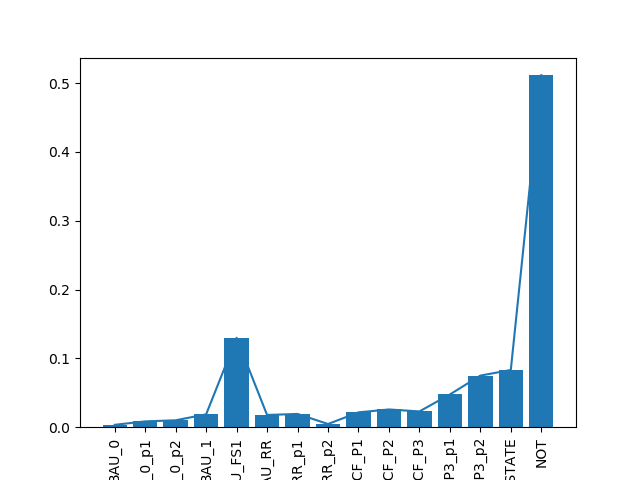

In [51]:
plt.plot([key for key in regimeAmounts.keys()],[val for val in regimeAmounts.values()])

In [52]:
plt.bar(range(len(regimeAmounts)), list(regimeAmounts.values()), align='center')
plt.xticks(range(len(regimeAmounts)), list(regimeAmounts.keys()),rotation="vertical")

([<matplotlib.axis.XTick at 0x18015c16dc8>,
 <a list of 15 Text xticklabel objects>)

## Export data as csv
- Solution_alldata contains the optimal regime per stand AND the timely development of indicator values plus all other input columns (represented_are_by_NFIplot, region)
- Solution contains only the selected optimal regime and its share (if multiple regimes per stand are selected)

In [104]:
import pandas as pd
import os

In [105]:
import os

try:
    os.mkdir("results")
except FileExistsError:
    pass
b = []
c = []
for key in mfo.regimesDecision.keys():
    if mfo.regimesDecision[key].solution_value() > 0:
        b = b+ [(key[0],x*5+2012, key[1]) for x in range(0,21)]
        c = c+ [(key[0],key[1],mfo.regimesDecision[key].solution_value())]
data2b = mfo.data.iloc[mfo.data.index.isin(b)]
data2b.to_csv("./results/MF_"+RCP+"_data.csv")
c1 = pd.DataFrame(c)
c1.to_csv("./results/MF_"+RCP+"_solutions.csv")

## Export objective ranges

In [106]:
for key in mfo.regimesDecision.keys():
        print(key,mfo.regimesDecision[key].solution_value())

(1, 'CCF_P1') 0.0
(1, 'CCF_P2') 0.0
(1, 'CCF_P3') 0.0
(1, 'CCF_P3_p1') 0.0
(1, 'CCF_P3_p2') 0.0
(1, 'CCF_STATE') 0.0
(1, 'NOT') 1.0000000000000002
(2, 'CCF_P1') 0.0
(2, 'CCF_P2') 0.0
(2, 'CCF_P3') 0.0
(2, 'CCF_P3_p1') 0.0
(2, 'CCF_P3_p2') 0.0
(2, 'CCF_STATE') 0.0
(2, 'NOT') 1.0
(3, 'CCF_P1') 0.0
(3, 'CCF_P2') 0.0
(3, 'CCF_P3') 0.0
(3, 'CCF_P3_p1') 0.0
(3, 'CCF_P3_p2') 0.0
(3, 'CCF_STATE') 0.0
(3, 'NOT') 1.0
(4, 'CCF_P1') 0.0
(4, 'CCF_P2') 0.0
(4, 'CCF_P3') 0.0
(4, 'CCF_P3_p1') 0.0
(4, 'CCF_P3_p2') 0.0
(4, 'CCF_STATE') 0.0
(4, 'NOT') 1.0
(5, 'CCF_P1') 0.0
(5, 'CCF_P2') 0.0
(5, 'CCF_P3') 0.0
(5, 'CCF_P3_p1') 0.0
(5, 'CCF_P3_p2') 0.0
(5, 'CCF_STATE') 0.0
(5, 'NOT') 1.0
(6, 'CCF_P1') 0.0
(6, 'CCF_P2') 0.0
(6, 'CCF_P3') 0.0
(6, 'CCF_P3_p1') 0.0
(6, 'CCF_P3_p2') 0.0
(6, 'CCF_STATE') 0.0
(6, 'NOT') 1.0000000000000002
(7, 'CCF_P1') 0.0
(7, 'CCF_P2') 0.0
(7, 'CCF_P3') 0.0
(7, 'CCF_P3_p1') 0.0
(7, 'CCF_P3_p2') 0.0
(7, 'CCF_STATE') 0.0
(7, 'NOT') 1.0
(8, 'CCF_P1') 0.0
(8, 'CCF_P2') 0.0
(8, 'CCF_P

(159, 'CCF_P3') 0.0
(159, 'CCF_P3_p1') 0.0
(159, 'CCF_P3_p2') 0.0
(159, 'CCF_STATE') 0.0
(159, 'NOT') 1.0
(160, 'CCF_P1') 0.0
(160, 'CCF_P2') 0.0
(160, 'CCF_P3') 0.0
(160, 'CCF_P3_p1') 0.0
(160, 'CCF_P3_p2') 0.0
(160, 'CCF_STATE') 0.0
(160, 'NOT') 1.0
(161, 'CCF_P1') 0.0
(161, 'CCF_P2') 0.0
(161, 'CCF_P3') 0.0
(161, 'CCF_P3_p1') 0.0
(161, 'CCF_P3_p2') 0.0
(161, 'CCF_STATE') 0.0
(161, 'NOT') 1.0
(162, 'CCF_P1') 0.0
(162, 'CCF_P2') 0.0
(162, 'CCF_P3') 0.0
(162, 'CCF_P3_p1') 0.0
(162, 'CCF_P3_p2') 0.0
(162, 'CCF_STATE') 0.0
(162, 'NOT') 1.0
(163, 'CCF_P1') 0.0
(163, 'CCF_P2') 0.0
(163, 'CCF_P3') 0.0
(163, 'CCF_P3_p1') 0.0
(163, 'CCF_P3_p2') 0.0
(163, 'CCF_STATE') 0.0
(163, 'NOT') 1.0
(164, 'CCF_P1') 0.0
(164, 'CCF_P2') 0.0
(164, 'CCF_P3') 0.0
(164, 'CCF_P3_p1') 0.0
(164, 'CCF_P3_p2') 0.0
(164, 'CCF_STATE') 0.0
(164, 'NOT') 1.0
(165, 'CCF_P1') 0.0
(165, 'CCF_P2') 0.0
(165, 'CCF_P3') 0.0
(165, 'CCF_P3_p1') 0.0
(165, 'CCF_P3_p2') 0.0
(165, 'CCF_STATE') 0.0
(165, 'NOT') 1.0
(166, 'CCF_P1') 0.

(265, 'CCF_P3_p1') 0.0
(265, 'CCF_P3_p2') 0.0
(265, 'CCF_STATE') 0.0
(265, 'NOT') 1.0
(266, 'CCF_P1') 0.0
(266, 'CCF_P2') 0.0
(266, 'CCF_P3') 0.0
(266, 'CCF_P3_p1') 0.0
(266, 'CCF_P3_p2') 0.0
(266, 'CCF_STATE') 0.0
(266, 'NOT') 1.0
(267, 'CCF_P1') 0.0
(267, 'CCF_P2') 0.0
(267, 'CCF_P3') 0.0
(267, 'CCF_P3_p1') 0.0
(267, 'CCF_P3_p2') 0.0
(267, 'CCF_STATE') 0.0
(267, 'NOT') 1.0
(268, 'CCF_P1') 0.0
(268, 'CCF_P2') 0.0
(268, 'CCF_P3') 0.0
(268, 'CCF_P3_p1') 0.0
(268, 'CCF_P3_p2') 0.0
(268, 'CCF_STATE') 0.0
(268, 'NOT') 1.0
(269, 'CCF_P1') 0.0
(269, 'CCF_P2') 0.0
(269, 'CCF_P3') 0.0
(269, 'CCF_P3_p1') 0.0
(269, 'CCF_P3_p2') 0.0
(269, 'CCF_STATE') 0.0
(269, 'NOT') 1.0
(270, 'CCF_P1') 0.0
(270, 'CCF_P2') 0.0
(270, 'CCF_P3') 0.0
(270, 'CCF_P3_p1') 0.0
(270, 'CCF_P3_p2') 0.0
(270, 'CCF_STATE') 0.0
(270, 'NOT') 1.0
(271, 'CCF_P1') 0.0
(271, 'CCF_P2') 0.0
(271, 'CCF_P3') 0.0
(271, 'CCF_P3_p1') 0.0
(271, 'CCF_P3_p2') 0.0
(271, 'CCF_STATE') 0.0
(271, 'NOT') 1.0
(272, 'CCF_P1') 0.0
(272, 'CCF_P2') 0.

(366, 'NOT') 0.9999999999999999
(367, 'CCF_P1') 2.0145419693297092e-11
(367, 'CCF_P2') -2.0145491645878375e-11
(367, 'CCF_P3') 0.0
(367, 'CCF_P3_p1') 0.0
(367, 'CCF_P3_p2') 0.0
(367, 'CCF_STATE') 0.0
(367, 'NOT') 1.0
(368, 'CCF_P1') 1.0
(368, 'CCF_P2') 0.0
(368, 'CCF_P3') 0.0
(368, 'CCF_P3_p1') 0.0
(368, 'CCF_P3_p2') 0.0
(368, 'CCF_STATE') 0.0
(368, 'NOT') 0.0
(369, 'CCF_P1') 1.0
(369, 'CCF_P2') 0.0
(369, 'CCF_P3') 0.0
(369, 'CCF_P3_p1') 0.0
(369, 'CCF_P3_p2') 0.0
(369, 'CCF_STATE') 0.0
(369, 'NOT') 0.0
(370, 'CCF_P1') 0.0
(370, 'CCF_P2') 0.0
(370, 'CCF_P3') 0.0
(370, 'CCF_P3_p1') 0.0
(370, 'CCF_P3_p2') 0.0
(370, 'CCF_STATE') 1.9990712630248472e-16
(370, 'NOT') 0.9999999999999999
(371, 'CCF_P1') 0.0
(371, 'CCF_P2') 0.0
(371, 'CCF_P3') 0.0
(371, 'CCF_P3_p1') 0.0
(371, 'CCF_P3_p2') 0.0
(371, 'CCF_STATE') 0.0
(371, 'NOT') 1.0
(372, 'CCF_P1') 0.0
(372, 'CCF_P2') 0.0
(372, 'CCF_P3') 0.0
(372, 'CCF_P3_p1') 0.0
(372, 'CCF_P3_p2') 0.0
(372, 'CCF_STATE') 0.0
(372, 'NOT') 1.0
(373, 'CCF_P1') 0.0

(465, 'CCF_STATE') 0.0
(465, 'NOT') 0.9999999999999999
(466, 'CCF_P1') 1.0
(466, 'CCF_P2') 0.0
(466, 'CCF_P3') 0.0
(466, 'CCF_P3_p1') 0.0
(466, 'CCF_P3_p2') 0.0
(466, 'CCF_STATE') 0.0
(466, 'NOT') 0.0
(467, 'CCF_P1') 1.8059843848070054e-16
(467, 'CCF_P2') 0.0
(467, 'CCF_P3') 0.0
(467, 'CCF_P3_p1') 0.0
(467, 'CCF_P3_p2') 0.0
(467, 'CCF_STATE') 0.0
(467, 'NOT') 0.9999999999999999
(468, 'CCF_P1') 0.0
(468, 'CCF_P2') 0.0
(468, 'CCF_P3') 0.0
(468, 'CCF_P3_p1') 0.0
(468, 'CCF_P3_p2') 0.0
(468, 'CCF_STATE') 0.0
(468, 'NOT') 1.0
(469, 'CCF_P1') 0.0
(469, 'CCF_P2') 0.0
(469, 'CCF_P3') 0.0
(469, 'CCF_P3_p1') 0.0
(469, 'CCF_P3_p2') 0.0
(469, 'CCF_STATE') 1.0
(469, 'NOT') 0.0
(470, 'CCF_P1') 0.0
(470, 'CCF_P2') 0.0
(470, 'CCF_P3') 0.0
(470, 'CCF_P3_p1') 0.0
(470, 'CCF_P3_p2') 0.0
(470, 'CCF_STATE') 0.0
(470, 'NOT') 1.0
(471, 'CCF_P1') 0.0
(471, 'CCF_P2') 0.0
(471, 'CCF_P3') 0.0
(471, 'CCF_P3_p1') 0.0
(471, 'CCF_P3_p2') 0.0
(471, 'CCF_STATE') 0.0
(471, 'NOT') 1.0
(472, 'CCF_P1') 0.0
(472, 'CCF_P2')

(563, 'NOT') 1.0
(564, 'CCF_P1') 0.0
(564, 'CCF_P2') 0.0
(564, 'CCF_P3') 0.0
(564, 'CCF_P3_p1') 0.0
(564, 'CCF_P3_p2') 1.0
(564, 'CCF_STATE') 0.0
(564, 'NOT') 0.0
(565, 'CCF_P1') 0.0
(565, 'CCF_P2') 0.0
(565, 'CCF_P3') 0.0
(565, 'CCF_P3_p1') 0.0
(565, 'CCF_P3_p2') 0.0
(565, 'CCF_STATE') 0.0
(565, 'NOT') 1.0
(566, 'CCF_P1') 0.0
(566, 'CCF_P2') 0.0
(566, 'CCF_P3') 0.0
(566, 'CCF_P3_p1') 0.0
(566, 'CCF_P3_p2') 0.0
(566, 'CCF_STATE') 0.0
(566, 'NOT') 1.0
(567, 'CCF_P1') 1.0
(567, 'CCF_P2') 0.0
(567, 'CCF_P3') 0.0
(567, 'CCF_P3_p1') 0.0
(567, 'CCF_P3_p2') 0.0
(567, 'CCF_STATE') 0.0
(567, 'NOT') 0.0
(568, 'CCF_P1') 0.0
(568, 'CCF_P2') 0.0
(568, 'CCF_P3') 0.0
(568, 'CCF_P3_p1') 0.0
(568, 'CCF_P3_p2') 0.0
(568, 'CCF_STATE') 0.0
(568, 'NOT') 1.0
(569, 'CCF_P1') 0.0
(569, 'CCF_P2') 0.0
(569, 'CCF_P3') 0.0
(569, 'CCF_P3_p1') 0.0
(569, 'CCF_P3_p2') 0.0
(569, 'CCF_STATE') 0.0
(569, 'NOT') 1.0
(570, 'CCF_P1') 0.0
(570, 'CCF_P2') 0.0
(570, 'CCF_P3') 0.0
(570, 'CCF_P3_p1') 0.0
(570, 'CCF_P3_p2') 0.0
(

(665, 'CCF_P3') 0.5734655819937744
(665, 'CCF_P3_p1') 0.0
(665, 'CCF_P3_p2') 0.42653441800622566
(665, 'CCF_STATE') 0.0
(665, 'NOT') 0.0
(666, 'CCF_P1') 0.0
(666, 'CCF_P2') 0.0
(666, 'CCF_P3') 0.0
(666, 'CCF_P3_p1') 0.0
(666, 'CCF_P3_p2') 0.0
(666, 'CCF_STATE') 1.0
(666, 'NOT') 0.0
(667, 'CCF_P1') 0.0
(667, 'CCF_P2') 0.0
(667, 'CCF_P3') 0.0
(667, 'CCF_P3_p1') 0.0
(667, 'CCF_P3_p2') 0.0
(667, 'CCF_STATE') 0.0
(667, 'NOT') 1.0
(668, 'CCF_P1') 0.0
(668, 'CCF_P2') 0.0
(668, 'CCF_P3') 0.0
(668, 'CCF_P3_p1') 0.0
(668, 'CCF_P3_p2') 0.0
(668, 'CCF_STATE') 0.0
(668, 'NOT') 1.0
(669, 'CCF_P1') 0.0
(669, 'CCF_P2') 0.0
(669, 'CCF_P3') 0.0
(669, 'CCF_P3_p1') 0.0
(669, 'CCF_P3_p2') 0.0
(669, 'CCF_STATE') 0.0
(669, 'NOT') 1.0
(670, 'CCF_P1') 0.0
(670, 'CCF_P2') 0.0
(670, 'CCF_P3') 0.0
(670, 'CCF_P3_p1') 0.0
(670, 'CCF_P3_p2') 0.0
(670, 'CCF_STATE') 0.0
(670, 'NOT') 1.0
(671, 'CCF_P1') 0.0
(671, 'CCF_P2') 0.0
(671, 'CCF_P3') 0.0
(671, 'CCF_P3_p1') 0.0
(671, 'CCF_P3_p2') 0.0
(671, 'CCF_STATE') 0.0
(671

(768, 'CCF_P3') 0.0
(768, 'CCF_P3_p1') 0.0
(768, 'CCF_P3_p2') 0.0
(768, 'CCF_STATE') 0.0
(768, 'NOT') 1.0
(769, 'CCF_P1') 0.0
(769, 'CCF_P2') 0.0
(769, 'CCF_P3') 0.0
(769, 'CCF_P3_p1') 0.0
(769, 'CCF_P3_p2') 0.0
(769, 'CCF_STATE') 1.4754413092101825e-16
(769, 'NOT') 0.9999999999999999
(770, 'CCF_P1') 0.0
(770, 'CCF_P2') 0.0
(770, 'CCF_P3') 0.0
(770, 'CCF_P3_p1') 0.0
(770, 'CCF_P3_p2') 0.0
(770, 'CCF_STATE') 0.0
(770, 'NOT') 1.0
(771, 'CCF_P1') 0.0
(771, 'CCF_P2') 0.0
(771, 'CCF_P3') 0.0
(771, 'CCF_P3_p1') 0.0
(771, 'CCF_P3_p2') 0.0
(771, 'CCF_STATE') 0.0
(771, 'NOT') 1.0
(772, 'CCF_P1') 0.0
(772, 'CCF_P2') 0.0
(772, 'CCF_P3') 0.0
(772, 'CCF_P3_p1') 0.0
(772, 'CCF_P3_p2') 0.0
(772, 'CCF_STATE') 0.0
(772, 'NOT') 1.0
(773, 'CCF_P1') 0.0
(773, 'CCF_P2') 0.0
(773, 'CCF_P3') 0.0
(773, 'CCF_P3_p1') 0.0
(773, 'CCF_P3_p2') 0.0
(773, 'CCF_STATE') 0.0
(773, 'NOT') 1.0
(774, 'CCF_P1') 0.0
(774, 'CCF_P2') 0.0
(774, 'CCF_P3') 0.0
(774, 'CCF_P3_p1') 0.0
(774, 'CCF_P3_p2') 0.0
(774, 'CCF_STATE') 0.0
(

(872, 'CCF_P3_p1') 0.0
(872, 'CCF_P3_p2') 0.0
(872, 'CCF_STATE') 0.0
(872, 'NOT') 1.0
(873, 'CCF_P1') 0.0
(873, 'CCF_P2') 0.0
(873, 'CCF_P3') 0.0
(873, 'CCF_P3_p1') 0.0
(873, 'CCF_P3_p2') 0.0
(873, 'CCF_STATE') 0.0
(873, 'NOT') 1.0
(874, 'CCF_P1') 0.0
(874, 'CCF_P2') 0.0
(874, 'CCF_P3') 0.0
(874, 'CCF_P3_p1') 0.0
(874, 'CCF_P3_p2') 0.0
(874, 'CCF_STATE') 0.0
(874, 'NOT') 1.0
(875, 'CCF_P1') 0.0
(875, 'CCF_P2') 2.0916268088102093e-16
(875, 'CCF_P3') 0.0
(875, 'CCF_P3_p1') 0.0
(875, 'CCF_P3_p2') 0.0
(875, 'CCF_STATE') 0.0
(875, 'NOT') 0.9999999999999999
(876, 'CCF_P1') 0.0
(876, 'CCF_P2') 0.0
(876, 'CCF_P3') 0.0
(876, 'CCF_P3_p1') 0.0
(876, 'CCF_P3_p2') 0.0
(876, 'CCF_STATE') 0.0
(876, 'NOT') 1.0
(877, 'CCF_P1') 0.0
(877, 'CCF_P2') 0.0
(877, 'CCF_P3') 0.0
(877, 'CCF_P3_p1') 0.0
(877, 'CCF_P3_p2') 0.0
(877, 'CCF_STATE') 0.0
(877, 'NOT') 1.0
(878, 'CCF_P1') 0.0
(878, 'CCF_P2') 0.0
(878, 'CCF_P3') 0.0
(878, 'CCF_P3_p1') 0.0
(878, 'CCF_P3_p2') 0.0
(878, 'CCF_STATE') 0.0
(878, 'NOT') 1.0
(879

(970, 'CCF_P1') 0.0
(970, 'CCF_P2') 0.0
(970, 'CCF_P3') 0.0
(970, 'CCF_P3_p1') 0.0
(970, 'CCF_P3_p2') 0.0
(970, 'CCF_STATE') 0.0
(970, 'NOT') 1.0
(971, 'CCF_P1') 1.0
(971, 'CCF_P2') 0.0
(971, 'CCF_P3') 0.0
(971, 'CCF_P3_p1') 0.0
(971, 'CCF_P3_p2') 0.0
(971, 'CCF_STATE') 0.0
(971, 'NOT') 0.0
(972, 'CCF_P1') 0.0
(972, 'CCF_P2') 0.0
(972, 'CCF_P3') 2.6601797368567212e-11
(972, 'CCF_P3_p1') 0.0
(972, 'CCF_P3_p2') -2.660171622301854e-11
(972, 'CCF_STATE') 0.0
(972, 'NOT') 0.9999999999999999
(973, 'CCF_P1') 0.0
(973, 'CCF_P2') 0.0
(973, 'CCF_P3') 0.0
(973, 'CCF_P3_p1') 0.0
(973, 'CCF_P3_p2') 0.0
(973, 'CCF_STATE') 0.0
(973, 'NOT') 1.0
(974, 'CCF_P1') 0.0
(974, 'CCF_P2') 0.0
(974, 'CCF_P3') 0.0
(974, 'CCF_P3_p1') 0.0
(974, 'CCF_P3_p2') 0.0
(974, 'CCF_STATE') 0.0
(974, 'NOT') 1.0
(975, 'CCF_P1') 0.0
(975, 'CCF_P2') 0.0
(975, 'CCF_P3') 0.0
(975, 'CCF_P3_p1') 0.0
(975, 'CCF_P3_p2') 0.0
(975, 'CCF_STATE') 0.0
(975, 'NOT') 1.0
(976, 'CCF_P1') 0.0
(976, 'CCF_P2') 0.0
(976, 'CCF_P3') 0.0
(976, 'CCF_

(1067, 'CCF_P2') 0.0
(1067, 'CCF_P3') 0.0
(1067, 'CCF_P3_p1') 0.0
(1067, 'CCF_P3_p2') 0.0
(1067, 'CCF_STATE') 0.9999999999999999
(1067, 'NOT') 0.0
(1068, 'CCF_P1') 0.0
(1068, 'CCF_P2') 0.0
(1068, 'CCF_P3') 0.0
(1068, 'CCF_P3_p1') 0.0
(1068, 'CCF_P3_p2') 0.0
(1068, 'CCF_STATE') 0.0
(1068, 'NOT') 1.0
(1069, 'CCF_P1') 0.0
(1069, 'CCF_P2') 0.0
(1069, 'CCF_P3') 0.0
(1069, 'CCF_P3_p1') 0.0
(1069, 'CCF_P3_p2') 0.0
(1069, 'CCF_STATE') 0.9999999999999999
(1069, 'NOT') 0.0
(1070, 'CCF_P1') 0.0
(1070, 'CCF_P2') 0.0
(1070, 'CCF_P3') 0.0
(1070, 'CCF_P3_p1') 0.0
(1070, 'CCF_P3_p2') 0.0
(1070, 'CCF_STATE') 1.0
(1070, 'NOT') 0.0
(1071, 'CCF_P1') 0.0
(1071, 'CCF_P2') 0.0
(1071, 'CCF_P3') 1.0
(1071, 'CCF_P3_p1') 0.0
(1071, 'CCF_P3_p2') 0.0
(1071, 'CCF_STATE') 0.0
(1071, 'NOT') 0.0
(1072, 'CCF_P1') 0.0
(1072, 'CCF_P2') 0.0
(1072, 'CCF_P3') 0.0
(1072, 'CCF_P3_p1') 0.0
(1072, 'CCF_P3_p2') 0.0
(1072, 'CCF_STATE') 1.0
(1072, 'NOT') 0.0
(1073, 'CCF_P1') 0.0
(1073, 'CCF_P2') 0.0
(1073, 'CCF_P3') 0.0
(1073, 'CC

(1169, 'NOT') 0.0
(1170, 'CCF_P1') 0.0
(1170, 'CCF_P2') 0.0
(1170, 'CCF_P3') 0.0
(1170, 'CCF_P3_p1') 0.0
(1170, 'CCF_P3_p2') 0.0
(1170, 'CCF_STATE') 1.0
(1170, 'NOT') 0.0
(1171, 'CCF_P1') 0.0
(1171, 'CCF_P2') 0.0
(1171, 'CCF_P3') 0.0
(1171, 'CCF_P3_p1') 0.0
(1171, 'CCF_P3_p2') 1.0
(1171, 'CCF_STATE') 0.0
(1171, 'NOT') 0.0
(1172, 'CCF_P1') 0.0
(1172, 'CCF_P2') 0.0
(1172, 'CCF_P3') 0.0
(1172, 'CCF_P3_p1') 0.0
(1172, 'CCF_P3_p2') 0.0
(1172, 'CCF_STATE') 0.0
(1172, 'NOT') 1.0
(1173, 'CCF_P1') 0.0
(1173, 'CCF_P2') 0.0
(1173, 'CCF_P3') 1.0
(1173, 'CCF_P3_p1') 0.0
(1173, 'CCF_P3_p2') 0.0
(1173, 'CCF_STATE') 0.0
(1173, 'NOT') 0.0
(1174, 'CCF_P1') 0.0
(1174, 'CCF_P2') 0.0
(1174, 'CCF_P3') 0.0
(1174, 'CCF_P3_p1') 0.0
(1174, 'CCF_P3_p2') 0.0
(1174, 'CCF_STATE') 1.554609829478558e-16
(1174, 'NOT') 0.9999999999999999
(1175, 'CCF_P1') 0.0
(1175, 'CCF_P2') 0.0
(1175, 'CCF_P3') 0.0
(1175, 'CCF_P3_p1') 0.0
(1175, 'CCF_P3_p2') 0.0
(1175, 'CCF_STATE') 0.0
(1175, 'NOT') 1.0
(1176, 'CCF_P1') 0.0
(1176, 'CC

(1273, 'CCF_P3_p2') 0.0
(1273, 'CCF_STATE') 0.0
(1273, 'NOT') 1.0
(1274, 'CCF_P1') 0.0
(1274, 'CCF_P2') 0.0
(1274, 'CCF_P3') 0.0
(1274, 'CCF_P3_p1') 0.0
(1274, 'CCF_P3_p2') 0.0
(1274, 'CCF_STATE') 0.0
(1274, 'NOT') 1.0
(1275, 'CCF_P1') 0.0
(1275, 'CCF_P2') 0.0
(1275, 'CCF_P3') 0.0
(1275, 'CCF_P3_p1') 0.0
(1275, 'CCF_P3_p2') 0.0
(1275, 'CCF_STATE') 0.0
(1275, 'NOT') 1.0
(1276, 'CCF_P1') 0.0
(1276, 'CCF_P2') 0.0
(1276, 'CCF_P3') 0.0
(1276, 'CCF_P3_p1') 0.0
(1276, 'CCF_P3_p2') 0.0
(1276, 'CCF_STATE') 0.0
(1276, 'NOT') 1.0
(1277, 'CCF_P1') 0.0
(1277, 'CCF_P2') 0.0
(1277, 'CCF_P3') 0.0
(1277, 'CCF_P3_p1') 0.0
(1277, 'CCF_P3_p2') 0.0
(1277, 'CCF_STATE') 0.0
(1277, 'NOT') 1.0
(1278, 'CCF_P1') 0.0
(1278, 'CCF_P2') 0.0
(1278, 'CCF_P3') 0.0
(1278, 'CCF_P3_p1') 0.0
(1278, 'CCF_P3_p2') 0.0
(1278, 'CCF_STATE') 0.0
(1278, 'NOT') 1.0
(1279, 'CCF_P1') 1.0000000000000002
(1279, 'CCF_P2') 0.0
(1279, 'CCF_P3') 0.0
(1279, 'CCF_P3_p1') 0.0
(1279, 'CCF_P3_p2') 0.0
(1279, 'CCF_STATE') 0.0
(1279, 'NOT') 0.0
(

(1384, 'CCF_STATE') 0.0
(1384, 'NOT') 0.0
(1385, 'CCF_P1') 0.0
(1385, 'CCF_P2') 0.0
(1385, 'CCF_P3') 0.0
(1385, 'CCF_P3_p1') 0.0
(1385, 'CCF_P3_p2') 0.0
(1385, 'CCF_STATE') 0.0
(1385, 'NOT') 1.0
(1386, 'CCF_P1') 0.0
(1386, 'CCF_P2') 1.0
(1386, 'CCF_P3') 0.0
(1386, 'CCF_P3_p1') 0.0
(1386, 'CCF_P3_p2') 0.0
(1386, 'CCF_STATE') 0.0
(1386, 'NOT') 0.0
(1387, 'CCF_P1') 0.0
(1387, 'CCF_P2') 0.0
(1387, 'CCF_P3') 0.0
(1387, 'CCF_P3_p1') 0.0
(1387, 'CCF_P3_p2') 0.0
(1387, 'CCF_STATE') 0.0
(1387, 'NOT') 1.0
(1388, 'CCF_P1') 0.0
(1388, 'CCF_P2') 0.0
(1388, 'CCF_P3') 0.0
(1388, 'CCF_P3_p1') 0.0
(1388, 'CCF_P3_p2') 0.0
(1388, 'CCF_STATE') 0.0
(1388, 'NOT') 1.0
(1389, 'CCF_P1') 0.0
(1389, 'CCF_P2') 1.0
(1389, 'CCF_P3') 0.0
(1389, 'CCF_P3_p1') 0.0
(1389, 'CCF_P3_p2') 0.0
(1389, 'CCF_STATE') 0.0
(1389, 'NOT') 0.0
(1390, 'CCF_P1') 0.0
(1390, 'CCF_P2') 0.0
(1390, 'CCF_P3') 0.0
(1390, 'CCF_P3_p1') 0.0
(1390, 'CCF_P3_p2') 0.0
(1390, 'CCF_STATE') 0.0
(1390, 'NOT') 1.0
(1391, 'CCF_P1') 0.0
(1391, 'CCF_P2') 0.

(1496, 'CCF_P3_p1') 0.0
(1496, 'CCF_P3_p2') 0.0
(1496, 'CCF_STATE') 0.0
(1496, 'NOT') 1.0
(1497, 'CCF_P1') 0.0
(1497, 'CCF_P2') 0.0
(1497, 'CCF_P3') 0.0
(1497, 'CCF_P3_p1') 0.0
(1497, 'CCF_P3_p2') 0.0
(1497, 'CCF_STATE') 0.0
(1497, 'NOT') 1.0
(1498, 'CCF_P1') 0.0
(1498, 'CCF_P2') 0.0
(1498, 'CCF_P3') 0.0
(1498, 'CCF_P3_p1') 0.0
(1498, 'CCF_P3_p2') 0.0
(1498, 'CCF_STATE') 0.0
(1498, 'NOT') 1.0
(1499, 'CCF_P1') 0.0
(1499, 'CCF_P2') 0.0
(1499, 'CCF_P3') 0.0
(1499, 'CCF_P3_p1') 0.0
(1499, 'CCF_P3_p2') 0.0
(1499, 'CCF_STATE') 0.0
(1499, 'NOT') 1.0
(1500, 'CCF_P1') 0.0
(1500, 'CCF_P2') 0.0
(1500, 'CCF_P3') 0.0
(1500, 'CCF_P3_p1') 0.0
(1500, 'CCF_P3_p2') 0.0
(1500, 'CCF_STATE') 0.0
(1500, 'NOT') 1.0
(1501, 'CCF_P1') 0.0
(1501, 'CCF_P2') 0.0
(1501, 'CCF_P3') 0.0
(1501, 'CCF_P3_p1') 0.0
(1501, 'CCF_P3_p2') 0.0
(1501, 'CCF_STATE') 0.0
(1501, 'NOT') 1.0
(1503, 'CCF_P1') 0.0
(1503, 'CCF_P2') 0.0
(1503, 'CCF_P3') 0.0
(1503, 'CCF_P3_p1') 1.0000000000000002
(1503, 'CCF_P3_p2') 0.0
(1503, 'CCF_STATE')

(1605, 'CCF_P3') 0.0
(1605, 'CCF_P3_p1') 0.0
(1605, 'CCF_P3_p2') 1.0
(1605, 'CCF_STATE') 0.0
(1605, 'NOT') 0.0
(1606, 'CCF_P1') 0.0
(1606, 'CCF_P2') 0.0
(1606, 'CCF_P3') 0.0
(1606, 'CCF_P3_p1') 0.0
(1606, 'CCF_P3_p2') 0.0
(1606, 'CCF_STATE') 0.0
(1606, 'NOT') 1.0
(1607, 'CCF_P1') 0.0
(1607, 'CCF_P2') 0.0
(1607, 'CCF_P3') 0.0
(1607, 'CCF_P3_p1') 0.0
(1607, 'CCF_P3_p2') 0.0
(1607, 'CCF_STATE') 0.0
(1607, 'NOT') 1.0
(1608, 'CCF_P1') 0.0
(1608, 'CCF_P2') 0.0
(1608, 'CCF_P3') 0.0
(1608, 'CCF_P3_p1') 0.0
(1608, 'CCF_P3_p2') 0.0
(1608, 'CCF_STATE') 0.0
(1608, 'NOT') 1.0
(1609, 'CCF_P1') 0.0
(1609, 'CCF_P2') 0.0
(1609, 'CCF_P3') 0.0
(1609, 'CCF_P3_p1') 0.0
(1609, 'CCF_P3_p2') 0.0
(1609, 'CCF_STATE') 0.0
(1609, 'NOT') 1.0
(1610, 'CCF_P1') 0.0
(1610, 'CCF_P2') 0.0
(1610, 'CCF_P3') 0.0
(1610, 'CCF_P3_p1') 0.0
(1610, 'CCF_P3_p2') 0.0
(1610, 'CCF_STATE') 0.0
(1610, 'NOT') 1.0
(1611, 'CCF_P1') 0.0
(1611, 'CCF_P2') 0.0
(1611, 'CCF_P3') 0.0
(1611, 'CCF_P3_p1') 0.0
(1611, 'CCF_P3_p2') 0.0
(1611, 'CCF_S

(1711, 'CCF_P3_p2') 0.0
(1711, 'CCF_STATE') 0.0
(1711, 'NOT') 1.0
(1712, 'CCF_P1') 0.0
(1712, 'CCF_P2') 0.0
(1712, 'CCF_P3') 0.0
(1712, 'CCF_P3_p1') 0.0
(1712, 'CCF_P3_p2') 0.0
(1712, 'CCF_STATE') 0.0
(1712, 'NOT') 1.0
(1714, 'CCF_P1') 0.0
(1714, 'CCF_P2') 0.0
(1714, 'CCF_P3') 0.0
(1714, 'CCF_P3_p1') 0.0
(1714, 'CCF_P3_p2') 0.0
(1714, 'CCF_STATE') 0.0
(1714, 'NOT') 1.0
(1715, 'CCF_P1') 0.0
(1715, 'CCF_P2') 0.0
(1715, 'CCF_P3') 0.0
(1715, 'CCF_P3_p1') 0.0
(1715, 'CCF_P3_p2') 0.0
(1715, 'CCF_STATE') 0.0
(1715, 'NOT') 1.0
(1716, 'CCF_P1') 0.0
(1716, 'CCF_P2') 0.0
(1716, 'CCF_P3') 0.0
(1716, 'CCF_P3_p1') 0.0
(1716, 'CCF_P3_p2') 0.0
(1716, 'CCF_STATE') 0.0
(1716, 'NOT') 1.0
(1717, 'CCF_P1') 0.0
(1717, 'CCF_P2') 0.0
(1717, 'CCF_P3') 0.0
(1717, 'CCF_P3_p1') 0.0
(1717, 'CCF_P3_p2') 0.0
(1717, 'CCF_STATE') 0.0
(1717, 'NOT') 1.0
(1718, 'CCF_P1') 0.0
(1718, 'CCF_P2') 0.0
(1718, 'CCF_P3') 0.0
(1718, 'CCF_P3_p1') 0.0
(1718, 'CCF_P3_p2') 0.0
(1718, 'CCF_STATE') 0.0
(1718, 'NOT') 1.0
(1720, 'CCF_P1')

(1818, 'CCF_P2') 0.0
(1818, 'CCF_P3') 0.0
(1818, 'CCF_P3_p1') 0.0
(1818, 'CCF_P3_p2') 0.0
(1818, 'CCF_STATE') 0.0
(1818, 'NOT') 1.0
(1819, 'CCF_P1') 1.5202356394197736e-16
(1819, 'CCF_P2') 0.0
(1819, 'CCF_P3') 0.0
(1819, 'CCF_P3_p1') 0.0
(1819, 'CCF_P3_p2') 0.0
(1819, 'CCF_STATE') 0.0
(1819, 'NOT') 0.9999999999999999
(1820, 'CCF_P1') 0.0
(1820, 'CCF_P2') 0.0
(1820, 'CCF_P3') 0.0
(1820, 'CCF_P3_p1') 0.0
(1820, 'CCF_P3_p2') 0.0
(1820, 'CCF_STATE') 0.0
(1820, 'NOT') 1.0
(1821, 'CCF_P1') 0.0
(1821, 'CCF_P2') 0.0
(1821, 'CCF_P3') 0.0
(1821, 'CCF_P3_p1') 0.0
(1821, 'CCF_P3_p2') 0.0
(1821, 'CCF_STATE') 0.0
(1821, 'NOT') 1.0
(1822, 'CCF_P1') 0.0
(1822, 'CCF_P2') -3.999135290862498e-12
(1822, 'CCF_P3') 0.0
(1822, 'CCF_P3_p1') 0.0
(1822, 'CCF_P3_p2') 0.0
(1822, 'CCF_STATE') 3.999141434149803e-12
(1822, 'NOT') 1.0
(1823, 'CCF_P1') 0.0
(1823, 'CCF_P2') 0.0
(1823, 'CCF_P3') 0.0
(1823, 'CCF_P3_p1') 0.0
(1823, 'CCF_P3_p2') 0.0
(1823, 'CCF_STATE') 0.0
(1823, 'NOT') 1.0
(1824, 'CCF_P1') 0.0
(1824, 'CCF

(1877, 'BAU_0_p1') 0.0
(1877, 'BAU_0_p2') 0.0
(1877, 'BAU_1') 0.0
(1877, 'BAU_FS1') 1.0
(1877, 'BAU_RR') 0.0
(1877, 'BAU_RR_p1') 0.0
(1877, 'BAU_RR_p2') 0.0
(1878, 'CCF_P1') 0.0
(1878, 'CCF_P2') 0.0
(1878, 'CCF_P3') 0.0
(1878, 'CCF_P3_p1') 0.0
(1878, 'CCF_P3_p2') 0.0
(1878, 'CCF_STATE') 0.0
(1878, 'NOT') 0.9999999999999999
(1878, 'BAU_0') 0.0
(1878, 'BAU_0_p1') 0.0
(1878, 'BAU_0_p2') 0.0
(1878, 'BAU_1') 0.0
(1878, 'BAU_FS1') 0.0
(1878, 'BAU_RR') 0.0
(1878, 'BAU_RR_p1') 0.0
(1878, 'BAU_RR_p2') 0.0
(1879, 'CCF_P1') 0.0
(1879, 'CCF_P2') 0.0
(1879, 'CCF_P3') 0.0
(1879, 'CCF_P3_p1') 0.0
(1879, 'CCF_P3_p2') 0.0
(1879, 'CCF_STATE') 0.0
(1879, 'NOT') 1.0
(1879, 'BAU_0') 0.0
(1879, 'BAU_0_p1') 0.0
(1879, 'BAU_0_p2') 0.0
(1879, 'BAU_1') 0.0
(1879, 'BAU_FS1') 0.0
(1879, 'BAU_RR') 0.0
(1879, 'BAU_RR_p1') 0.0
(1879, 'BAU_RR_p2') 0.0
(1880, 'CCF_P1') 0.0
(1880, 'CCF_P2') 0.0
(1880, 'CCF_P3') 0.0
(1880, 'CCF_P3_p1') 0.0
(1880, 'CCF_P3_p2') 0.0
(1880, 'CCF_STATE') 0.0
(1880, 'NOT') 0.0
(1880, 'BAU_0')

(1924, 'CCF_STATE') 1.0
(1924, 'NOT') 0.0
(1924, 'BAU_0') 0.0
(1924, 'BAU_0_p1') 0.0
(1924, 'BAU_0_p2') 0.0
(1924, 'BAU_1') 0.0
(1924, 'BAU_FS1') 0.0
(1924, 'BAU_RR') 0.0
(1924, 'BAU_RR_p1') 0.0
(1924, 'BAU_RR_p2') 0.0
(1925, 'CCF_P1') 0.0
(1925, 'CCF_P2') 0.0
(1925, 'CCF_P3') 0.0
(1925, 'CCF_P3_p1') 0.0
(1925, 'CCF_P3_p2') 0.0
(1925, 'CCF_STATE') 0.0
(1925, 'NOT') 1.0
(1925, 'BAU_0') 0.0
(1925, 'BAU_0_p1') 0.0
(1925, 'BAU_0_p2') 0.0
(1925, 'BAU_1') 0.0
(1925, 'BAU_FS1') 0.0
(1925, 'BAU_RR') 0.0
(1925, 'BAU_RR_p1') 0.0
(1925, 'BAU_RR_p2') 0.0
(1926, 'CCF_P1') 0.0
(1926, 'CCF_P2') 0.0
(1926, 'CCF_P3') 0.0
(1926, 'CCF_P3_p1') 0.0
(1926, 'CCF_P3_p2') 0.0
(1926, 'CCF_STATE') 0.0
(1926, 'NOT') 0.0
(1926, 'BAU_0') 0.0
(1926, 'BAU_0_p1') 0.0
(1926, 'BAU_0_p2') 0.0
(1926, 'BAU_1') 0.0
(1926, 'BAU_FS1') 0.0
(1926, 'BAU_RR') 1.0000000000000002
(1926, 'BAU_RR_p1') 0.0
(1926, 'BAU_RR_p2') 0.0
(1927, 'CCF_P1') 0.0
(1927, 'CCF_P2') 0.0
(1927, 'CCF_P3') 0.0
(1927, 'CCF_P3_p1') 0.0
(1927, 'CCF_P3_p2')

(1974, 'CCF_P3_p1') 0.0
(1974, 'CCF_P3_p2') 0.0
(1974, 'CCF_STATE') 0.0
(1974, 'NOT') 1.0
(1974, 'BAU_0') 0.0
(1974, 'BAU_0_p1') 0.0
(1974, 'BAU_0_p2') 0.0
(1974, 'BAU_1') 0.0
(1974, 'BAU_FS1') 0.0
(1974, 'BAU_RR') 0.0
(1974, 'BAU_RR_p1') 0.0
(1974, 'BAU_RR_p2') 0.0
(1975, 'CCF_P1') 0.0
(1975, 'CCF_P2') 0.0
(1975, 'CCF_P3') 0.0
(1975, 'CCF_P3_p1') 0.0
(1975, 'CCF_P3_p2') 0.0
(1975, 'CCF_STATE') 0.0
(1975, 'NOT') 1.0
(1975, 'BAU_0') 0.0
(1975, 'BAU_0_p1') 0.0
(1975, 'BAU_0_p2') 0.0
(1975, 'BAU_1') 0.0
(1975, 'BAU_FS1') 0.0
(1975, 'BAU_RR') 0.0
(1975, 'BAU_RR_p1') 0.0
(1975, 'BAU_RR_p2') 0.0
(1976, 'CCF_P1') 0.0
(1976, 'CCF_P2') 0.0
(1976, 'CCF_P3') 0.0
(1976, 'CCF_P3_p1') 0.0
(1976, 'CCF_P3_p2') 0.0
(1976, 'CCF_STATE') 0.0
(1976, 'NOT') 0.0
(1976, 'BAU_0') 0.0
(1976, 'BAU_0_p1') 0.0
(1976, 'BAU_0_p2') 0.0
(1976, 'BAU_1') 0.0
(1976, 'BAU_FS1') 1.0
(1976, 'BAU_RR') 0.0
(1976, 'BAU_RR_p1') 0.0
(1976, 'BAU_RR_p2') 0.0
(1977, 'CCF_P1') 0.0
(1977, 'CCF_P2') 0.0
(1977, 'CCF_P3') 0.0
(1977, 'CC

(2022, 'BAU_RR') 0.0
(2022, 'BAU_RR_p1') 0.0
(2022, 'BAU_RR_p2') 0.0
(2023, 'CCF_P1') 0.0
(2023, 'CCF_P2') 0.0
(2023, 'CCF_P3') 0.0
(2023, 'CCF_P3_p1') 0.0
(2023, 'CCF_P3_p2') 0.0
(2023, 'CCF_STATE') 0.0
(2023, 'NOT') 1.0
(2023, 'BAU_0') 0.0
(2023, 'BAU_0_p1') 0.0
(2023, 'BAU_0_p2') 0.0
(2023, 'BAU_1') 0.0
(2023, 'BAU_FS1') 0.0
(2023, 'BAU_RR') 0.0
(2023, 'BAU_RR_p1') 0.0
(2023, 'BAU_RR_p2') 0.0
(2024, 'CCF_P1') 0.0
(2024, 'CCF_P2') 0.0
(2024, 'CCF_P3') 0.0
(2024, 'CCF_P3_p1') 0.0
(2024, 'CCF_P3_p2') 1.31810647487423e-16
(2024, 'CCF_STATE') 0.0
(2024, 'NOT') 0.9999999999999999
(2024, 'BAU_0') 0.0
(2024, 'BAU_0_p1') 0.0
(2024, 'BAU_0_p2') 0.0
(2024, 'BAU_1') 0.0
(2024, 'BAU_FS1') 0.0
(2024, 'BAU_RR') 0.0
(2024, 'BAU_RR_p1') 0.0
(2024, 'BAU_RR_p2') 0.0
(2025, 'CCF_P1') 0.0
(2025, 'CCF_P2') 0.0
(2025, 'CCF_P3') 0.0
(2025, 'CCF_P3_p1') 0.0
(2025, 'CCF_P3_p2') 0.0
(2025, 'CCF_STATE') 0.0
(2025, 'NOT') 0.0
(2025, 'BAU_0') 0.0
(2025, 'BAU_0_p1') 0.0
(2025, 'BAU_0_p2') 0.0
(2025, 'BAU_1') 0.0


(2072, 'CCF_P3_p1') 0.0
(2072, 'CCF_P3_p2') 0.0
(2072, 'CCF_STATE') 0.0
(2072, 'NOT') 1.0
(2072, 'BAU_0') 0.0
(2072, 'BAU_0_p1') 0.0
(2072, 'BAU_0_p2') 0.0
(2072, 'BAU_1') 0.0
(2072, 'BAU_FS1') 0.0
(2072, 'BAU_RR') 0.0
(2072, 'BAU_RR_p1') 0.0
(2072, 'BAU_RR_p2') 0.0
(2073, 'CCF_P1') 0.0
(2073, 'CCF_P2') 0.0
(2073, 'CCF_P3') 0.0
(2073, 'CCF_P3_p1') 0.0
(2073, 'CCF_P3_p2') 0.0
(2073, 'CCF_STATE') 0.0
(2073, 'NOT') 1.0
(2073, 'BAU_0') 0.0
(2073, 'BAU_0_p1') 0.0
(2073, 'BAU_0_p2') 0.0
(2073, 'BAU_1') 0.0
(2073, 'BAU_FS1') 0.0
(2073, 'BAU_RR') 0.0
(2073, 'BAU_RR_p1') 0.0
(2073, 'BAU_RR_p2') 0.0
(2074, 'CCF_P1') 0.0
(2074, 'CCF_P2') 0.0
(2074, 'CCF_P3') 0.0
(2074, 'CCF_P3_p1') 0.0
(2074, 'CCF_P3_p2') 0.0
(2074, 'CCF_STATE') 0.0
(2074, 'NOT') 1.0
(2074, 'BAU_0') 0.0
(2074, 'BAU_0_p1') 0.0
(2074, 'BAU_0_p2') 0.0
(2074, 'BAU_1') 0.0
(2074, 'BAU_FS1') 0.0
(2074, 'BAU_RR') 0.0
(2074, 'BAU_RR_p1') 0.0
(2074, 'BAU_RR_p2') 0.0
(2075, 'CCF_P1') 0.0
(2075, 'CCF_P2') 0.0
(2075, 'CCF_P3') 0.0
(2075, 'CC

(2122, 'BAU_FS1') 0.0
(2122, 'BAU_RR') 0.0
(2122, 'BAU_RR_p1') 0.0
(2122, 'BAU_RR_p2') 0.0
(2123, 'CCF_P1') 1.0
(2123, 'CCF_P2') 0.0
(2123, 'CCF_P3') 0.0
(2123, 'CCF_P3_p1') 0.0
(2123, 'CCF_P3_p2') 0.0
(2123, 'CCF_STATE') 0.0
(2123, 'NOT') 0.0
(2123, 'BAU_0') 0.0
(2123, 'BAU_0_p1') 0.0
(2123, 'BAU_0_p2') 0.0
(2123, 'BAU_1') 0.0
(2123, 'BAU_FS1') 0.0
(2123, 'BAU_RR') 0.0
(2123, 'BAU_RR_p1') 0.0
(2123, 'BAU_RR_p2') 0.0
(2124, 'CCF_P1') 0.0
(2124, 'CCF_P2') 0.0
(2124, 'CCF_P3') 0.0
(2124, 'CCF_P3_p1') 0.0
(2124, 'CCF_P3_p2') 0.0
(2124, 'CCF_STATE') 0.0
(2124, 'NOT') 1.0
(2124, 'BAU_0') 0.0
(2124, 'BAU_0_p1') 0.0
(2124, 'BAU_0_p2') 0.0
(2124, 'BAU_1') 0.0
(2124, 'BAU_FS1') 0.0
(2124, 'BAU_RR') 0.0
(2124, 'BAU_RR_p1') 0.0
(2124, 'BAU_RR_p2') 0.0
(2125, 'CCF_P1') 0.0
(2125, 'CCF_P2') 0.0
(2125, 'CCF_P3') 0.0
(2125, 'CCF_P3_p1') 0.0
(2125, 'CCF_P3_p2') 0.0
(2125, 'CCF_STATE') 0.0
(2125, 'NOT') 1.0
(2125, 'BAU_0') 0.0
(2125, 'BAU_0_p1') 1.0279759538409582e-11
(2125, 'BAU_0_p2') 0.0
(2125, 'BAU

(2170, 'CCF_P3_p1') 0.0
(2170, 'CCF_P3_p2') 0.0
(2170, 'CCF_STATE') 0.0
(2170, 'NOT') 1.0
(2170, 'BAU_0') 0.0
(2170, 'BAU_0_p1') 0.0
(2170, 'BAU_0_p2') 0.0
(2170, 'BAU_1') 0.0
(2170, 'BAU_FS1') 0.0
(2170, 'BAU_RR') 0.0
(2170, 'BAU_RR_p1') 0.0
(2170, 'BAU_RR_p2') 0.0
(2171, 'CCF_P1') 0.0
(2171, 'CCF_P2') 0.0
(2171, 'CCF_P3') 0.0
(2171, 'CCF_P3_p1') 0.0
(2171, 'CCF_P3_p2') 0.0
(2171, 'CCF_STATE') 0.7821359353641402
(2171, 'NOT') 0.21786406463585975
(2171, 'BAU_0') 0.0
(2171, 'BAU_0_p1') 0.0
(2171, 'BAU_0_p2') 0.0
(2171, 'BAU_1') 0.0
(2171, 'BAU_FS1') 0.0
(2171, 'BAU_RR') 0.0
(2171, 'BAU_RR_p1') 0.0
(2171, 'BAU_RR_p2') 0.0
(2172, 'CCF_P1') 0.0
(2172, 'CCF_P2') 0.0
(2172, 'CCF_P3') 0.0
(2172, 'CCF_P3_p1') 0.0
(2172, 'CCF_P3_p2') 0.0
(2172, 'CCF_STATE') 0.0
(2172, 'NOT') 9.454909147223073e-12
(2172, 'BAU_0') -9.45491274441437e-12
(2172, 'BAU_0_p1') 0.0
(2172, 'BAU_0_p2') 0.0
(2172, 'BAU_1') 0.0
(2172, 'BAU_FS1') 1.0
(2172, 'BAU_RR') 0.0
(2172, 'BAU_RR_p1') 0.0
(2172, 'BAU_RR_p2') 0.0
(2173,

(2219, 'BAU_0_p1') 0.0
(2219, 'BAU_0_p2') 0.0
(2219, 'BAU_1') 1.0
(2219, 'BAU_FS1') 0.0
(2219, 'BAU_RR') 0.0
(2219, 'BAU_RR_p1') 0.0
(2219, 'BAU_RR_p2') 0.0
(2220, 'CCF_P1') 0.0
(2220, 'CCF_P2') 0.0
(2220, 'CCF_P3') 0.0
(2220, 'CCF_P3_p1') 0.0
(2220, 'CCF_P3_p2') 0.0
(2220, 'CCF_STATE') 0.0
(2220, 'NOT') 1.0
(2220, 'BAU_0') 0.0
(2220, 'BAU_0_p1') 0.0
(2220, 'BAU_0_p2') 0.0
(2220, 'BAU_1') 0.0
(2220, 'BAU_FS1') 0.0
(2220, 'BAU_RR') 0.0
(2220, 'BAU_RR_p1') 0.0
(2220, 'BAU_RR_p2') 0.0
(2221, 'CCF_P1') 0.0
(2221, 'CCF_P2') 0.0
(2221, 'CCF_P3') 0.0
(2221, 'CCF_P3_p1') 0.0
(2221, 'CCF_P3_p2') 0.0
(2221, 'CCF_STATE') 0.0
(2221, 'NOT') 1.0
(2221, 'BAU_0') 0.0
(2221, 'BAU_0_p1') 0.0
(2221, 'BAU_0_p2') 0.0
(2221, 'BAU_1') 0.0
(2221, 'BAU_FS1') 0.0
(2221, 'BAU_RR') 0.0
(2221, 'BAU_RR_p1') 0.0
(2221, 'BAU_RR_p2') 0.0
(2222, 'CCF_P1') 0.0
(2222, 'CCF_P2') 0.0
(2222, 'CCF_P3') 0.0
(2222, 'CCF_P3_p1') 0.0
(2222, 'CCF_P3_p2') 0.0
(2222, 'CCF_STATE') 0.0
(2222, 'NOT') 0.5663571848623252
(2222, 'BAU_0')

(2273, 'CCF_P1') 0.0
(2273, 'CCF_P2') 0.0
(2273, 'CCF_P3') 0.0
(2273, 'CCF_P3_p1') 0.0
(2273, 'CCF_P3_p2') 0.0
(2273, 'CCF_STATE') 0.0
(2273, 'NOT') 1.0
(2273, 'BAU_0') 0.0
(2273, 'BAU_0_p1') 0.0
(2273, 'BAU_0_p2') 0.0
(2273, 'BAU_1') 0.0
(2273, 'BAU_FS1') 0.0
(2273, 'BAU_RR') 0.0
(2273, 'BAU_RR_p1') 0.0
(2273, 'BAU_RR_p2') 0.0
(2274, 'CCF_P1') 0.0
(2274, 'CCF_P2') 0.0
(2274, 'CCF_P3') 0.0
(2274, 'CCF_P3_p1') 0.0
(2274, 'CCF_P3_p2') 0.0
(2274, 'CCF_STATE') 0.0
(2274, 'NOT') 0.0
(2274, 'BAU_0') 0.0
(2274, 'BAU_0_p1') 0.0
(2274, 'BAU_0_p2') 0.0
(2274, 'BAU_1') 0.0
(2274, 'BAU_FS1') 1.0
(2274, 'BAU_RR') 0.0
(2274, 'BAU_RR_p1') 0.0
(2274, 'BAU_RR_p2') 0.0
(2275, 'CCF_P1') 0.0
(2275, 'CCF_P2') 0.0
(2275, 'CCF_P3') 0.0
(2275, 'CCF_P3_p1') 0.0
(2275, 'CCF_P3_p2') 0.0
(2275, 'CCF_STATE') 0.0
(2275, 'NOT') 1.0
(2275, 'BAU_0') 0.0
(2275, 'BAU_0_p1') 0.0
(2275, 'BAU_0_p2') 0.0
(2275, 'BAU_1') 0.0
(2275, 'BAU_FS1') 0.0
(2275, 'BAU_RR') 0.0
(2275, 'BAU_RR_p1') 0.0
(2275, 'BAU_RR_p2') 0.0
(2276, 'CC

(2325, 'BAU_RR_p2') 0.0
(2326, 'CCF_P1') 0.0
(2326, 'CCF_P2') 0.0
(2326, 'CCF_P3') 0.0
(2326, 'CCF_P3_p1') 0.0
(2326, 'CCF_P3_p2') 0.0
(2326, 'CCF_STATE') 0.0
(2326, 'NOT') 1.0
(2326, 'BAU_0') 0.0
(2326, 'BAU_0_p1') 0.0
(2326, 'BAU_0_p2') 0.0
(2326, 'BAU_1') 0.0
(2326, 'BAU_FS1') 0.0
(2326, 'BAU_RR') 0.0
(2326, 'BAU_RR_p1') 0.0
(2326, 'BAU_RR_p2') 0.0
(2327, 'CCF_P1') 0.0
(2327, 'CCF_P2') 0.0
(2327, 'CCF_P3') 0.0
(2327, 'CCF_P3_p1') 0.0
(2327, 'CCF_P3_p2') 0.0
(2327, 'CCF_STATE') 0.0
(2327, 'NOT') 1.0
(2327, 'BAU_0') 0.0
(2327, 'BAU_0_p1') 0.0
(2327, 'BAU_0_p2') 0.0
(2327, 'BAU_1') 0.0
(2327, 'BAU_FS1') 0.0
(2327, 'BAU_RR') 0.0
(2327, 'BAU_RR_p1') 0.0
(2327, 'BAU_RR_p2') 0.0
(2328, 'CCF_P1') 0.0
(2328, 'CCF_P2') 0.0
(2328, 'CCF_P3') 0.0
(2328, 'CCF_P3_p1') 0.0
(2328, 'CCF_P3_p2') 0.0
(2328, 'CCF_STATE') 0.0
(2328, 'NOT') 1.0
(2328, 'BAU_0') 0.0
(2328, 'BAU_0_p1') 0.0
(2328, 'BAU_0_p2') 0.0
(2328, 'BAU_1') 0.0
(2328, 'BAU_FS1') 0.0
(2328, 'BAU_RR') 0.0
(2328, 'BAU_RR_p1') 0.0
(2328, 'BA

(2374, 'CCF_P3_p1') 0.0
(2374, 'CCF_P3_p2') 0.0
(2374, 'CCF_STATE') 0.0
(2374, 'NOT') 0.0
(2374, 'BAU_0') 0.0
(2374, 'BAU_0_p1') 0.0
(2374, 'BAU_0_p2') 0.0
(2374, 'BAU_1') 0.0
(2374, 'BAU_FS1') 1.0
(2374, 'BAU_RR') 0.0
(2374, 'BAU_RR_p1') 0.0
(2374, 'BAU_RR_p2') 0.0
(2375, 'CCF_P1') 0.0
(2375, 'CCF_P2') 0.0
(2375, 'CCF_P3') 0.0
(2375, 'CCF_P3_p1') 0.0
(2375, 'CCF_P3_p2') 0.0
(2375, 'CCF_STATE') 0.0
(2375, 'NOT') 1.0
(2375, 'BAU_0') 0.0
(2375, 'BAU_0_p1') 0.0
(2375, 'BAU_0_p2') 0.0
(2375, 'BAU_1') 0.0
(2375, 'BAU_FS1') 0.0
(2375, 'BAU_RR') 0.0
(2375, 'BAU_RR_p1') 0.0
(2375, 'BAU_RR_p2') 0.0
(2376, 'CCF_P1') 0.0
(2376, 'CCF_P2') 0.0
(2376, 'CCF_P3') 0.0
(2376, 'CCF_P3_p1') 0.0
(2376, 'CCF_P3_p2') 0.0
(2376, 'CCF_STATE') 0.0
(2376, 'NOT') 1.0
(2376, 'BAU_0') 0.0
(2376, 'BAU_0_p1') 0.0
(2376, 'BAU_0_p2') 0.0
(2376, 'BAU_1') 0.0
(2376, 'BAU_FS1') 0.0
(2376, 'BAU_RR') 0.0
(2376, 'BAU_RR_p1') 0.0
(2376, 'BAU_RR_p2') 0.0
(2377, 'CCF_P1') 0.0
(2377, 'CCF_P2') 0.0
(2377, 'CCF_P3') 0.0
(2377, 'CC

(2426, 'CCF_P2') 0.0
(2426, 'CCF_P3') 0.0
(2426, 'CCF_P3_p1') 0.0
(2426, 'CCF_P3_p2') 0.0
(2426, 'CCF_STATE') 0.0
(2426, 'NOT') 1.0
(2426, 'BAU_0') 0.0
(2426, 'BAU_0_p1') 0.0
(2426, 'BAU_0_p2') 0.0
(2426, 'BAU_1') 0.0
(2426, 'BAU_FS1') 0.0
(2426, 'BAU_RR') 0.0
(2426, 'BAU_RR_p1') 0.0
(2426, 'BAU_RR_p2') 0.0
(2427, 'CCF_P1') 0.0
(2427, 'CCF_P2') 0.0
(2427, 'CCF_P3') 0.0
(2427, 'CCF_P3_p1') 0.0
(2427, 'CCF_P3_p2') 0.0
(2427, 'CCF_STATE') 0.0
(2427, 'NOT') 1.0
(2427, 'BAU_0') 0.0
(2427, 'BAU_0_p1') 0.0
(2427, 'BAU_0_p2') 0.0
(2427, 'BAU_1') 0.0
(2427, 'BAU_FS1') 0.0
(2427, 'BAU_RR') 0.0
(2427, 'BAU_RR_p1') 0.0
(2427, 'BAU_RR_p2') 0.0
(2428, 'CCF_P1') 0.0
(2428, 'CCF_P2') 0.0
(2428, 'CCF_P3') 0.0
(2428, 'CCF_P3_p1') 0.0
(2428, 'CCF_P3_p2') 0.0
(2428, 'CCF_STATE') 0.0
(2428, 'NOT') 0.0
(2428, 'BAU_0') 0.0
(2428, 'BAU_0_p1') 0.0
(2428, 'BAU_0_p2') 0.0
(2428, 'BAU_1') 0.0
(2428, 'BAU_FS1') 1.0
(2428, 'BAU_RR') 0.0
(2428, 'BAU_RR_p1') 0.0
(2428, 'BAU_RR_p2') 0.0
(2429, 'CCF_P1') 0.0
(2429, 'CC

(2476, 'BAU_RR_p1') 0.0
(2476, 'BAU_RR_p2') 0.0
(2477, 'CCF_P1') 0.3884492577323563
(2477, 'CCF_P2') 0.0
(2477, 'CCF_P3') 0.0
(2477, 'CCF_P3_p1') 0.6115507422676438
(2477, 'CCF_P3_p2') 0.0
(2477, 'CCF_STATE') 0.0
(2477, 'NOT') 0.0
(2477, 'BAU_0') 0.0
(2477, 'BAU_0_p1') 0.0
(2477, 'BAU_0_p2') 0.0
(2477, 'BAU_1') 0.0
(2477, 'BAU_FS1') 0.0
(2477, 'BAU_RR') 0.0
(2477, 'BAU_RR_p1') 0.0
(2477, 'BAU_RR_p2') 0.0
(2478, 'CCF_P1') 0.0
(2478, 'CCF_P2') 0.0
(2478, 'CCF_P3') 0.0
(2478, 'CCF_P3_p1') 0.0
(2478, 'CCF_P3_p2') 0.0
(2478, 'CCF_STATE') 0.0
(2478, 'NOT') 0.0
(2478, 'BAU_0') 0.0
(2478, 'BAU_0_p1') 1.0
(2478, 'BAU_0_p2') 0.0
(2478, 'BAU_1') 0.0
(2478, 'BAU_FS1') 0.0
(2478, 'BAU_RR') 0.0
(2478, 'BAU_RR_p1') 0.0
(2478, 'BAU_RR_p2') 0.0
(2479, 'CCF_P1') 0.0
(2479, 'CCF_P2') 1.0
(2479, 'CCF_P3') 0.0
(2479, 'CCF_P3_p1') 0.0
(2479, 'CCF_P3_p2') 0.0
(2479, 'CCF_STATE') 0.0
(2479, 'NOT') 0.0
(2479, 'BAU_0') 0.0
(2479, 'BAU_0_p1') 0.0
(2479, 'BAU_0_p2') 0.0
(2479, 'BAU_1') 0.0
(2479, 'BAU_FS1') 0.0
(

(2528, 'CCF_P2') 0.0
(2528, 'CCF_P3') 0.0
(2528, 'CCF_P3_p1') 0.0
(2528, 'CCF_P3_p2') 0.0
(2528, 'CCF_STATE') 0.0
(2528, 'NOT') 1.0
(2528, 'BAU_0') 0.0
(2528, 'BAU_0_p1') 0.0
(2528, 'BAU_0_p2') 0.0
(2528, 'BAU_1') 0.0
(2528, 'BAU_FS1') 0.0
(2528, 'BAU_RR') 0.0
(2528, 'BAU_RR_p1') 0.0
(2528, 'BAU_RR_p2') 0.0
(2529, 'CCF_P1') 0.0
(2529, 'CCF_P2') 0.0
(2529, 'CCF_P3') 0.0
(2529, 'CCF_P3_p1') 0.0
(2529, 'CCF_P3_p2') 0.0
(2529, 'CCF_STATE') 0.0
(2529, 'NOT') 1.0
(2529, 'BAU_0') 0.0
(2529, 'BAU_0_p1') 0.0
(2529, 'BAU_0_p2') 0.0
(2529, 'BAU_1') 0.0
(2529, 'BAU_FS1') 0.0
(2529, 'BAU_RR') 0.0
(2529, 'BAU_RR_p1') 0.0
(2529, 'BAU_RR_p2') 0.0
(2530, 'CCF_P1') 0.0
(2530, 'CCF_P2') 1.0
(2530, 'CCF_P3') 0.0
(2530, 'CCF_P3_p1') 0.0
(2530, 'CCF_P3_p2') 0.0
(2530, 'CCF_STATE') 0.0
(2530, 'NOT') 0.0
(2530, 'BAU_0') 0.0
(2530, 'BAU_0_p1') 0.0
(2530, 'BAU_0_p2') 0.0
(2530, 'BAU_1') 0.0
(2530, 'BAU_FS1') 0.0
(2530, 'BAU_RR') 0.0
(2530, 'BAU_RR_p1') 0.0
(2530, 'BAU_RR_p2') 0.0
(2531, 'CCF_P1') 0.0
(2531, 'CC

(2577, 'BAU_0') 0.0
(2577, 'BAU_0_p1') 0.0
(2577, 'BAU_0_p2') 0.0
(2577, 'BAU_1') 0.0
(2577, 'BAU_FS1') 0.0
(2577, 'BAU_RR') 0.0
(2577, 'BAU_RR_p1') 0.0
(2577, 'BAU_RR_p2') 0.0
(2578, 'CCF_P1') 0.0
(2578, 'CCF_P2') 0.0
(2578, 'CCF_P3') 0.0
(2578, 'CCF_P3_p1') 0.0
(2578, 'CCF_P3_p2') 0.0
(2578, 'CCF_STATE') 0.0
(2578, 'NOT') 1.0
(2578, 'BAU_0') 0.0
(2578, 'BAU_0_p1') 0.0
(2578, 'BAU_0_p2') 0.0
(2578, 'BAU_1') 0.0
(2578, 'BAU_FS1') 0.0
(2578, 'BAU_RR') 0.0
(2578, 'BAU_RR_p1') 0.0
(2578, 'BAU_RR_p2') 0.0
(2579, 'CCF_P1') 0.0
(2579, 'CCF_P2') 0.0
(2579, 'CCF_P3') 0.0
(2579, 'CCF_P3_p1') 0.0
(2579, 'CCF_P3_p2') 0.0
(2579, 'CCF_STATE') 0.0
(2579, 'NOT') 1.0
(2579, 'BAU_0') 0.0
(2579, 'BAU_0_p1') 0.0
(2579, 'BAU_0_p2') 0.0
(2579, 'BAU_1') 0.0
(2579, 'BAU_FS1') 0.0
(2579, 'BAU_RR') 0.0
(2579, 'BAU_RR_p1') 0.0
(2579, 'BAU_RR_p2') 0.0
(2580, 'CCF_P1') 0.0
(2580, 'CCF_P2') 0.0
(2580, 'CCF_P3') 0.0
(2580, 'CCF_P3_p1') 0.0
(2580, 'CCF_P3_p2') 1.0
(2580, 'CCF_STATE') 0.0
(2580, 'NOT') 0.0
(2580, 'BA

(2626, 'BAU_RR_p2') 0.0
(2627, 'CCF_P1') 0.0
(2627, 'CCF_P2') 0.0
(2627, 'CCF_P3') 0.0
(2627, 'CCF_P3_p1') 0.0
(2627, 'CCF_P3_p2') 0.0
(2627, 'CCF_STATE') 0.25979141437858494
(2627, 'NOT') 0.0
(2627, 'BAU_0') 0.7402085856214151
(2627, 'BAU_0_p1') 0.0
(2627, 'BAU_0_p2') 0.0
(2627, 'BAU_1') 0.0
(2627, 'BAU_FS1') 0.0
(2627, 'BAU_RR') 0.0
(2627, 'BAU_RR_p1') 0.0
(2627, 'BAU_RR_p2') 0.0
(2628, 'CCF_P1') 0.0
(2628, 'CCF_P2') 0.0
(2628, 'CCF_P3') 0.0
(2628, 'CCF_P3_p1') 0.0
(2628, 'CCF_P3_p2') 0.0
(2628, 'CCF_STATE') 0.0
(2628, 'NOT') 1.0
(2628, 'BAU_0') 0.0
(2628, 'BAU_0_p1') 0.0
(2628, 'BAU_0_p2') 0.0
(2628, 'BAU_1') 0.0
(2628, 'BAU_FS1') 0.0
(2628, 'BAU_RR') 0.0
(2628, 'BAU_RR_p1') 0.0
(2628, 'BAU_RR_p2') 0.0
(2629, 'CCF_P1') 0.0
(2629, 'CCF_P2') 0.0
(2629, 'CCF_P3') 0.0
(2629, 'CCF_P3_p1') 0.0
(2629, 'CCF_P3_p2') 0.0
(2629, 'CCF_STATE') 1.0
(2629, 'NOT') 0.0
(2629, 'BAU_0') 0.0
(2629, 'BAU_0_p1') 0.0
(2629, 'BAU_0_p2') 0.0
(2629, 'BAU_1') 0.0
(2629, 'BAU_FS1') 0.0
(2629, 'BAU_RR') 0.0
(26

(2677, 'CCF_P3_p2') 0.0
(2677, 'CCF_STATE') 0.0
(2677, 'NOT') 0.9999999999999999
(2677, 'BAU_0') 0.0
(2677, 'BAU_0_p1') 0.0
(2677, 'BAU_0_p2') 0.0
(2677, 'BAU_1') 0.0
(2677, 'BAU_FS1') 0.0
(2677, 'BAU_RR') 0.0
(2677, 'BAU_RR_p1') 0.0
(2677, 'BAU_RR_p2') 0.0
(2678, 'CCF_P1') 0.0
(2678, 'CCF_P2') 0.0
(2678, 'CCF_P3') 0.0
(2678, 'CCF_P3_p1') 0.0
(2678, 'CCF_P3_p2') 0.0
(2678, 'CCF_STATE') 0.0
(2678, 'NOT') 1.0
(2678, 'BAU_0') 0.0
(2678, 'BAU_0_p1') 0.0
(2678, 'BAU_0_p2') 0.0
(2678, 'BAU_1') 0.0
(2678, 'BAU_FS1') 0.0
(2678, 'BAU_RR') 0.0
(2678, 'BAU_RR_p1') 0.0
(2678, 'BAU_RR_p2') 0.0
(2679, 'CCF_P1') 0.0
(2679, 'CCF_P2') 0.0
(2679, 'CCF_P3') 0.0
(2679, 'CCF_P3_p1') 0.0
(2679, 'CCF_P3_p2') 0.0
(2679, 'CCF_STATE') 0.0
(2679, 'NOT') 1.0
(2679, 'BAU_0') 0.0
(2679, 'BAU_0_p1') 0.0
(2679, 'BAU_0_p2') 0.0
(2679, 'BAU_1') 0.0
(2679, 'BAU_FS1') 0.0
(2679, 'BAU_RR') 0.0
(2679, 'BAU_RR_p1') 0.0
(2679, 'BAU_RR_p2') 0.0
(2680, 'CCF_P1') 0.0
(2680, 'CCF_P2') 0.0
(2680, 'CCF_P3') 0.0
(2680, 'CCF_P3_p1')

(2726, 'BAU_FS1') 0.0
(2726, 'BAU_RR') 0.0
(2726, 'BAU_RR_p1') 0.0
(2726, 'BAU_RR_p2') 0.0
(2727, 'CCF_P1') 0.0
(2727, 'CCF_P2') 0.0
(2727, 'CCF_P3') 0.0
(2727, 'CCF_P3_p1') 0.0
(2727, 'CCF_P3_p2') 0.0
(2727, 'CCF_STATE') 0.0
(2727, 'NOT') 0.0
(2727, 'BAU_0') 0.0
(2727, 'BAU_0_p1') 0.0
(2727, 'BAU_0_p2') 0.0
(2727, 'BAU_1') 0.0
(2727, 'BAU_FS1') 0.0
(2727, 'BAU_RR') 0.0
(2727, 'BAU_RR_p1') 0.0
(2727, 'BAU_RR_p2') 1.0
(2728, 'CCF_P1') 0.0
(2728, 'CCF_P2') 0.0
(2728, 'CCF_P3') 0.0
(2728, 'CCF_P3_p1') 0.4323131141817702
(2728, 'CCF_P3_p2') 0.5676868858182298
(2728, 'CCF_STATE') 0.0
(2728, 'NOT') 0.0
(2728, 'BAU_0') 0.0
(2728, 'BAU_0_p1') 0.0
(2728, 'BAU_0_p2') 0.0
(2728, 'BAU_1') 0.0
(2728, 'BAU_FS1') 0.0
(2728, 'BAU_RR') 0.0
(2728, 'BAU_RR_p1') 0.0
(2728, 'BAU_RR_p2') 0.0
(2729, 'CCF_P1') 0.0
(2729, 'CCF_P2') 0.0
(2729, 'CCF_P3') 0.0
(2729, 'CCF_P3_p1') 0.0
(2729, 'CCF_P3_p2') 0.0
(2729, 'CCF_STATE') 0.0
(2729, 'NOT') 0.0
(2729, 'BAU_0') 0.0
(2729, 'BAU_0_p1') 0.0
(2729, 'BAU_0_p2') 0.0


(2774, 'CCF_P3') 0.0
(2774, 'CCF_P3_p1') 0.0
(2774, 'CCF_P3_p2') 0.0
(2774, 'CCF_STATE') 0.0
(2774, 'NOT') 1.0
(2774, 'BAU_0') 0.0
(2774, 'BAU_0_p1') 0.0
(2774, 'BAU_0_p2') 0.0
(2774, 'BAU_1') 0.0
(2774, 'BAU_FS1') 0.0
(2774, 'BAU_RR') 0.0
(2774, 'BAU_RR_p1') 0.0
(2774, 'BAU_RR_p2') 0.0
(2775, 'CCF_P1') 0.0
(2775, 'CCF_P2') 0.0
(2775, 'CCF_P3') 0.0
(2775, 'CCF_P3_p1') 0.0
(2775, 'CCF_P3_p2') 0.0
(2775, 'CCF_STATE') 0.0
(2775, 'NOT') 1.0
(2775, 'BAU_0') 0.0
(2775, 'BAU_0_p1') 0.0
(2775, 'BAU_0_p2') 0.0
(2775, 'BAU_1') 0.0
(2775, 'BAU_FS1') 0.0
(2775, 'BAU_RR') 0.0
(2775, 'BAU_RR_p1') 0.0
(2775, 'BAU_RR_p2') 0.0
(2776, 'CCF_P1') 0.0
(2776, 'CCF_P2') 0.0
(2776, 'CCF_P3') 0.0
(2776, 'CCF_P3_p1') 0.0
(2776, 'CCF_P3_p2') 0.0
(2776, 'CCF_STATE') 0.0
(2776, 'NOT') 1.0
(2776, 'BAU_0') 0.0
(2776, 'BAU_0_p1') 0.0
(2776, 'BAU_0_p2') 0.0
(2776, 'BAU_1') 0.0
(2776, 'BAU_FS1') 0.0
(2776, 'BAU_RR') 0.0
(2776, 'BAU_RR_p1') 0.0
(2776, 'BAU_RR_p2') 0.0
(2777, 'CCF_P1') 0.0
(2777, 'CCF_P2') 0.0
(2777, 'CC

(2819, 'BAU_RR') 0.0
(2819, 'BAU_RR_p1') 0.0
(2819, 'BAU_RR_p2') 0.0
(2820, 'CCF_P1') 0.0
(2820, 'CCF_P2') 0.0
(2820, 'CCF_P3') 0.0
(2820, 'CCF_P3_p1') 0.0
(2820, 'CCF_P3_p2') 0.0
(2820, 'CCF_STATE') 0.0
(2820, 'NOT') 1.0
(2820, 'BAU_0') 0.0
(2820, 'BAU_0_p1') 0.0
(2820, 'BAU_0_p2') 0.0
(2820, 'BAU_1') 0.0
(2820, 'BAU_FS1') 0.0
(2820, 'BAU_RR') 0.0
(2820, 'BAU_RR_p1') 0.0
(2820, 'BAU_RR_p2') 0.0
(2821, 'CCF_P1') 0.0
(2821, 'CCF_P2') 0.0
(2821, 'CCF_P3') 0.0
(2821, 'CCF_P3_p1') 0.0
(2821, 'CCF_P3_p2') 0.0
(2821, 'CCF_STATE') 0.0
(2821, 'NOT') 0.0
(2821, 'BAU_0') 0.0
(2821, 'BAU_0_p1') 0.0
(2821, 'BAU_0_p2') 0.0
(2821, 'BAU_1') 1.0
(2821, 'BAU_FS1') 0.0
(2821, 'BAU_RR') 0.0
(2821, 'BAU_RR_p1') 0.0
(2821, 'BAU_RR_p2') 0.0
(2822, 'CCF_P1') 0.0
(2822, 'CCF_P2') 0.0
(2822, 'CCF_P3') 0.0
(2822, 'CCF_P3_p1') 0.0
(2822, 'CCF_P3_p2') 0.0
(2822, 'CCF_STATE') 0.0
(2822, 'NOT') 1.0
(2822, 'BAU_0') 0.0
(2822, 'BAU_0_p1') 0.0
(2822, 'BAU_0_p2') 0.0
(2822, 'BAU_1') 0.0
(2822, 'BAU_FS1') 0.0
(2822, 'BA

(2870, 'BAU_RR') 1.0
(2870, 'BAU_RR_p1') 0.0
(2870, 'BAU_RR_p2') 0.0
(2871, 'CCF_P1') 0.0
(2871, 'CCF_P2') 0.0
(2871, 'CCF_P3') 0.0
(2871, 'CCF_P3_p1') 0.0
(2871, 'CCF_P3_p2') 0.0
(2871, 'CCF_STATE') 0.0
(2871, 'NOT') 1.0
(2871, 'BAU_0') 0.0
(2871, 'BAU_0_p1') 0.0
(2871, 'BAU_0_p2') 0.0
(2871, 'BAU_1') 0.0
(2871, 'BAU_FS1') 0.0
(2871, 'BAU_RR') 0.0
(2871, 'BAU_RR_p1') 0.0
(2871, 'BAU_RR_p2') 0.0
(2872, 'CCF_P1') 0.0
(2872, 'CCF_P2') 0.0
(2872, 'CCF_P3') 0.0
(2872, 'CCF_P3_p1') 0.0
(2872, 'CCF_P3_p2') 0.0
(2872, 'CCF_STATE') 0.0
(2872, 'NOT') 1.0000000000000002
(2872, 'BAU_0') 0.0
(2872, 'BAU_0_p1') 0.0
(2872, 'BAU_0_p2') 0.0
(2872, 'BAU_1') 0.0
(2872, 'BAU_FS1') 0.0
(2872, 'BAU_RR') 0.0
(2872, 'BAU_RR_p1') 0.0
(2872, 'BAU_RR_p2') 0.0
(2873, 'CCF_P1') 0.0
(2873, 'CCF_P2') 0.0
(2873, 'CCF_P3') 0.0
(2873, 'CCF_P3_p1') 0.0
(2873, 'CCF_P3_p2') 0.0
(2873, 'CCF_STATE') 0.0
(2873, 'NOT') 1.0
(2873, 'BAU_0') 0.0
(2873, 'BAU_0_p1') 0.0
(2873, 'BAU_0_p2') 0.0
(2873, 'BAU_1') 0.0
(2873, 'BAU_FS1')

(2920, 'CCF_STATE') 1.2356423297728716e-16
(2920, 'NOT') 0.9999999999999999
(2920, 'BAU_0') 0.0
(2920, 'BAU_0_p1') 0.0
(2920, 'BAU_0_p2') 0.0
(2920, 'BAU_1') 0.0
(2920, 'BAU_FS1') 0.0
(2920, 'BAU_RR') 0.0
(2920, 'BAU_RR_p1') 0.0
(2920, 'BAU_RR_p2') 0.0
(2921, 'CCF_P1') 0.0
(2921, 'CCF_P2') 0.0
(2921, 'CCF_P3') 0.0
(2921, 'CCF_P3_p1') 0.0
(2921, 'CCF_P3_p2') 0.0
(2921, 'CCF_STATE') 0.0
(2921, 'NOT') 1.0
(2921, 'BAU_0') 0.0
(2921, 'BAU_0_p1') 0.0
(2921, 'BAU_0_p2') 0.0
(2921, 'BAU_1') 0.0
(2921, 'BAU_FS1') 0.0
(2921, 'BAU_RR') 0.0
(2921, 'BAU_RR_p1') 0.0
(2921, 'BAU_RR_p2') 0.0
(2922, 'CCF_P1') 0.0
(2922, 'CCF_P2') 0.0
(2922, 'CCF_P3') 0.0
(2922, 'CCF_P3_p1') 0.0
(2922, 'CCF_P3_p2') 0.0
(2922, 'CCF_STATE') 0.0
(2922, 'NOT') 1.0
(2922, 'BAU_0') 0.0
(2922, 'BAU_0_p1') 0.0
(2922, 'BAU_0_p2') 0.0
(2922, 'BAU_1') 0.0
(2922, 'BAU_FS1') 0.0
(2922, 'BAU_RR') 0.0
(2922, 'BAU_RR_p1') 0.0
(2922, 'BAU_RR_p2') 0.0
(2923, 'CCF_P1') 0.0
(2923, 'CCF_P2') 0.0
(2923, 'CCF_P3') 0.0
(2923, 'CCF_P3_p1') 0.0


(2967, 'BAU_0_p2') 0.0
(2967, 'BAU_1') 0.0
(2967, 'BAU_FS1') 0.0
(2967, 'BAU_RR') 0.0
(2967, 'BAU_RR_p1') 0.0
(2967, 'BAU_RR_p2') 0.0
(2968, 'CCF_P1') 0.0
(2968, 'CCF_P2') 0.0
(2968, 'CCF_P3') 0.0
(2968, 'CCF_P3_p1') 0.0
(2968, 'CCF_P3_p2') 0.0
(2968, 'CCF_STATE') 0.0
(2968, 'NOT') 1.0
(2968, 'BAU_0') 0.0
(2968, 'BAU_0_p1') 0.0
(2968, 'BAU_0_p2') 0.0
(2968, 'BAU_1') 0.0
(2968, 'BAU_FS1') 0.0
(2968, 'BAU_RR') 0.0
(2968, 'BAU_RR_p1') 0.0
(2968, 'BAU_RR_p2') 0.0
(2969, 'CCF_P1') 0.0
(2969, 'CCF_P2') 0.0
(2969, 'CCF_P3') 0.0
(2969, 'CCF_P3_p1') 0.0
(2969, 'CCF_P3_p2') 0.0
(2969, 'CCF_STATE') 0.0
(2969, 'NOT') 1.0
(2969, 'BAU_0') 0.0
(2969, 'BAU_0_p1') 0.0
(2969, 'BAU_0_p2') 0.0
(2969, 'BAU_1') 0.0
(2969, 'BAU_FS1') 0.0
(2969, 'BAU_RR') 0.0
(2969, 'BAU_RR_p1') 0.0
(2969, 'BAU_RR_p2') 0.0
(2970, 'CCF_P1') 0.0
(2970, 'CCF_P2') 0.0
(2970, 'CCF_P3') 0.0
(2970, 'CCF_P3_p1') 0.0
(2970, 'CCF_P3_p2') 0.0
(2970, 'CCF_STATE') 0.0
(2970, 'NOT') 1.0
(2970, 'BAU_0') 0.0
(2970, 'BAU_0_p1') 0.0
(2970, 'BA

(3020, 'BAU_FS1') 0.0
(3020, 'BAU_RR') 0.0
(3020, 'BAU_RR_p1') 0.0
(3020, 'BAU_RR_p2') 0.0
(3021, 'CCF_P1') 0.0
(3021, 'CCF_P2') 0.0
(3021, 'CCF_P3') 0.0
(3021, 'CCF_P3_p1') 0.0
(3021, 'CCF_P3_p2') 0.0
(3021, 'CCF_STATE') 0.0
(3021, 'NOT') 1.0000000000000002
(3021, 'BAU_0') 0.0
(3021, 'BAU_0_p1') 0.0
(3021, 'BAU_0_p2') 0.0
(3021, 'BAU_1') 0.0
(3021, 'BAU_FS1') 0.0
(3021, 'BAU_RR') 0.0
(3021, 'BAU_RR_p1') 0.0
(3021, 'BAU_RR_p2') 0.0
(3022, 'CCF_P1') 0.0
(3022, 'CCF_P2') 0.0
(3022, 'CCF_P3') 0.0
(3022, 'CCF_P3_p1') 0.0
(3022, 'CCF_P3_p2') 0.0
(3022, 'CCF_STATE') 0.0
(3022, 'NOT') 0.9999999999999999
(3022, 'BAU_0') 0.0
(3022, 'BAU_0_p1') 0.0
(3022, 'BAU_0_p2') 0.0
(3022, 'BAU_1') 0.0
(3022, 'BAU_FS1') 0.0
(3022, 'BAU_RR') 0.0
(3022, 'BAU_RR_p1') 0.0
(3022, 'BAU_RR_p2') 0.0
(3023, 'CCF_P1') 0.0
(3023, 'CCF_P2') 0.0
(3023, 'CCF_P3') 0.0
(3023, 'CCF_P3_p1') 0.0
(3023, 'CCF_P3_p2') 0.0
(3023, 'CCF_STATE') 0.0
(3023, 'NOT') 0.0
(3023, 'BAU_0') 0.0
(3023, 'BAU_0_p1') 0.0
(3023, 'BAU_0_p2') 0.0


(3069, 'CCF_P3_p2') 0.0
(3069, 'CCF_STATE') 0.0
(3069, 'NOT') 1.0
(3069, 'BAU_0') 0.0
(3069, 'BAU_0_p1') 0.0
(3069, 'BAU_0_p2') 0.0
(3069, 'BAU_1') 0.0
(3069, 'BAU_FS1') 0.0
(3069, 'BAU_RR') 0.0
(3069, 'BAU_RR_p1') 0.0
(3069, 'BAU_RR_p2') 0.0
(3070, 'CCF_P1') 0.0
(3070, 'CCF_P2') 0.0
(3070, 'CCF_P3') 0.0
(3070, 'CCF_P3_p1') 0.0
(3070, 'CCF_P3_p2') 0.0
(3070, 'CCF_STATE') 0.0
(3070, 'NOT') 1.0
(3070, 'BAU_0') 0.0
(3070, 'BAU_0_p1') 0.0
(3070, 'BAU_0_p2') 0.0
(3070, 'BAU_1') 0.0
(3070, 'BAU_FS1') 0.0
(3070, 'BAU_RR') 0.0
(3070, 'BAU_RR_p1') 0.0
(3070, 'BAU_RR_p2') 0.0
(3071, 'CCF_P1') 1.0
(3071, 'CCF_P2') 0.0
(3071, 'CCF_P3') 0.0
(3071, 'CCF_P3_p1') 0.0
(3071, 'CCF_P3_p2') 0.0
(3071, 'CCF_STATE') 0.0
(3071, 'NOT') 0.0
(3071, 'BAU_0') 0.0
(3071, 'BAU_0_p1') 0.0
(3071, 'BAU_0_p2') 0.0
(3071, 'BAU_1') 0.0
(3071, 'BAU_FS1') 0.0
(3071, 'BAU_RR') 0.0
(3071, 'BAU_RR_p1') 0.0
(3071, 'BAU_RR_p2') 0.0
(3072, 'CCF_P1') 1.0
(3072, 'CCF_P2') 0.0
(3072, 'CCF_P3') 0.0
(3072, 'CCF_P3_p1') 0.0
(3072, 'CC

(3117, 'CCF_P3') 0.0
(3117, 'CCF_P3_p1') 0.0
(3117, 'CCF_P3_p2') 0.0
(3117, 'CCF_STATE') 0.0
(3117, 'NOT') 0.8450811705615678
(3117, 'BAU_0') 0.0
(3117, 'BAU_0_p1') 0.0
(3117, 'BAU_0_p2') 0.0
(3117, 'BAU_1') 0.0
(3117, 'BAU_FS1') 0.1549188294384321
(3117, 'BAU_RR') 0.0
(3117, 'BAU_RR_p1') 0.0
(3117, 'BAU_RR_p2') 0.0
(3118, 'CCF_P1') 0.0
(3118, 'CCF_P2') 0.0
(3118, 'CCF_P3') 0.0
(3118, 'CCF_P3_p1') 0.0
(3118, 'CCF_P3_p2') 0.0
(3118, 'CCF_STATE') 0.0
(3118, 'NOT') 0.0
(3118, 'BAU_0') 0.0
(3118, 'BAU_0_p1') 0.0
(3118, 'BAU_0_p2') 0.0
(3118, 'BAU_1') 0.0
(3118, 'BAU_FS1') 1.0
(3118, 'BAU_RR') 0.0
(3118, 'BAU_RR_p1') 0.0
(3118, 'BAU_RR_p2') 0.0
(3119, 'CCF_P1') 0.0
(3119, 'CCF_P2') 0.0
(3119, 'CCF_P3') 0.0
(3119, 'CCF_P3_p1') 0.0
(3119, 'CCF_P3_p2') 0.0
(3119, 'CCF_STATE') 0.0
(3119, 'NOT') 1.0
(3119, 'BAU_0') 0.0
(3119, 'BAU_0_p1') 0.0
(3119, 'BAU_0_p2') 0.0
(3119, 'BAU_1') 0.0
(3119, 'BAU_FS1') 0.0
(3119, 'BAU_RR') 0.0
(3119, 'BAU_RR_p1') 0.0
(3119, 'BAU_RR_p2') 0.0
(3120, 'CCF_P1') 0.0
(

(3169, 'CCF_P1') 0.0
(3169, 'CCF_P2') 0.0
(3169, 'CCF_P3') 0.0
(3169, 'CCF_P3_p1') 1.0
(3169, 'CCF_P3_p2') 0.0
(3169, 'CCF_STATE') 0.0
(3169, 'NOT') 0.0
(3169, 'BAU_0') 0.0
(3169, 'BAU_0_p1') 0.0
(3169, 'BAU_0_p2') 0.0
(3169, 'BAU_1') 0.0
(3169, 'BAU_FS1') 0.0
(3169, 'BAU_RR') 0.0
(3169, 'BAU_RR_p1') 0.0
(3169, 'BAU_RR_p2') 0.0
(3170, 'CCF_P1') 0.0
(3170, 'CCF_P2') 0.0
(3170, 'CCF_P3') 0.0
(3170, 'CCF_P3_p1') 0.0
(3170, 'CCF_P3_p2') 0.0
(3170, 'CCF_STATE') 0.0
(3170, 'NOT') 1.0
(3170, 'BAU_0') 0.0
(3170, 'BAU_0_p1') 0.0
(3170, 'BAU_0_p2') 0.0
(3170, 'BAU_1') 0.0
(3170, 'BAU_FS1') 0.0
(3170, 'BAU_RR') 0.0
(3170, 'BAU_RR_p1') 0.0
(3170, 'BAU_RR_p2') 0.0
(3171, 'CCF_P1') 0.0
(3171, 'CCF_P2') 0.0
(3171, 'CCF_P3') 1.0
(3171, 'CCF_P3_p1') 0.0
(3171, 'CCF_P3_p2') 0.0
(3171, 'CCF_STATE') 0.0
(3171, 'NOT') 0.0
(3171, 'BAU_0') 0.0
(3171, 'BAU_0_p1') 0.0
(3171, 'BAU_0_p2') 0.0
(3171, 'BAU_1') 0.0
(3171, 'BAU_FS1') 0.0
(3171, 'BAU_RR') 0.0
(3171, 'BAU_RR_p1') 0.0
(3171, 'BAU_RR_p2') 0.0
(3172, 'CC

(3215, 'CCF_P2') 0.0
(3215, 'CCF_P3') 0.0
(3215, 'CCF_P3_p1') 0.0
(3215, 'CCF_P3_p2') 0.0
(3215, 'CCF_STATE') 0.0
(3215, 'NOT') 0.0
(3215, 'BAU_0') 0.0
(3215, 'BAU_0_p1') 0.0
(3215, 'BAU_0_p2') 0.0
(3215, 'BAU_1') 0.0
(3215, 'BAU_FS1') 0.9999999999999999
(3215, 'BAU_RR') 0.0
(3215, 'BAU_RR_p1') 0.0
(3215, 'BAU_RR_p2') 2.1612069587071922e-16
(3216, 'CCF_P1') 0.0
(3216, 'CCF_P2') 0.0
(3216, 'CCF_P3') 0.0
(3216, 'CCF_P3_p1') 0.0
(3216, 'CCF_P3_p2') 0.0
(3216, 'CCF_STATE') 0.0
(3216, 'NOT') 0.0
(3216, 'BAU_0') 0.0
(3216, 'BAU_0_p1') 0.0
(3216, 'BAU_0_p2') 0.0
(3216, 'BAU_1') 0.0
(3216, 'BAU_FS1') 1.0
(3216, 'BAU_RR') 0.0
(3216, 'BAU_RR_p1') 0.0
(3216, 'BAU_RR_p2') 0.0
(3217, 'CCF_P1') 0.0
(3217, 'CCF_P2') 0.0
(3217, 'CCF_P3') 0.0
(3217, 'CCF_P3_p1') 0.0
(3217, 'CCF_P3_p2') 0.0
(3217, 'CCF_STATE') 0.0
(3217, 'NOT') 1.0
(3217, 'BAU_0') 0.0
(3217, 'BAU_0_p1') 0.0
(3217, 'BAU_0_p2') 0.0
(3217, 'BAU_1') 0.0
(3217, 'BAU_FS1') 0.0
(3217, 'BAU_RR') 0.0
(3217, 'BAU_RR_p1') 0.0
(3217, 'BAU_RR_p2') 0

(3261, 'BAU_1') 0.0
(3261, 'BAU_FS1') 0.0
(3261, 'BAU_RR') 0.0
(3261, 'BAU_RR_p1') 0.0
(3261, 'BAU_RR_p2') 0.0
(3262, 'CCF_P1') 0.0
(3262, 'CCF_P2') 0.0
(3262, 'CCF_P3') 0.0
(3262, 'CCF_P3_p1') 0.0
(3262, 'CCF_P3_p2') 0.0
(3262, 'CCF_STATE') 1.0
(3262, 'NOT') 0.0
(3262, 'BAU_0') 0.0
(3262, 'BAU_0_p1') 0.0
(3262, 'BAU_0_p2') 0.0
(3262, 'BAU_1') 0.0
(3262, 'BAU_FS1') 0.0
(3262, 'BAU_RR') 0.0
(3262, 'BAU_RR_p1') 0.0
(3262, 'BAU_RR_p2') 0.0
(3263, 'CCF_P1') 0.0
(3263, 'CCF_P2') 0.0
(3263, 'CCF_P3') 1.0
(3263, 'CCF_P3_p1') 0.0
(3263, 'CCF_P3_p2') 0.0
(3263, 'CCF_STATE') 0.0
(3263, 'NOT') 0.0
(3263, 'BAU_0') 0.0
(3263, 'BAU_0_p1') 0.0
(3263, 'BAU_0_p2') 0.0
(3263, 'BAU_1') 0.0
(3263, 'BAU_FS1') 0.0
(3263, 'BAU_RR') 0.0
(3263, 'BAU_RR_p1') 0.0
(3263, 'BAU_RR_p2') 0.0
(3264, 'CCF_P1') 0.0
(3264, 'CCF_P2') 0.0
(3264, 'CCF_P3') 0.0
(3264, 'CCF_P3_p1') 0.0
(3264, 'CCF_P3_p2') 0.0
(3264, 'CCF_STATE') 1.0
(3264, 'NOT') 0.0
(3264, 'BAU_0') 0.0
(3264, 'BAU_0_p1') 0.0
(3264, 'BAU_0_p2') 0.0
(3264, 'BA

(3309, 'BAU_1') 0.0
(3309, 'BAU_FS1') 0.0
(3309, 'BAU_RR') 0.0
(3309, 'BAU_RR_p1') 0.0
(3309, 'BAU_RR_p2') 0.0
(3310, 'CCF_P1') 0.0
(3310, 'CCF_P2') 0.0
(3310, 'CCF_P3') 0.0
(3310, 'CCF_P3_p1') 0.0
(3310, 'CCF_P3_p2') 0.0
(3310, 'CCF_STATE') 0.0
(3310, 'NOT') 0.0
(3310, 'BAU_0') 0.0
(3310, 'BAU_0_p1') 0.0
(3310, 'BAU_0_p2') 0.0
(3310, 'BAU_1') 0.0
(3310, 'BAU_FS1') 0.0
(3310, 'BAU_RR') 0.0
(3310, 'BAU_RR_p1') 0.0
(3310, 'BAU_RR_p2') 1.0
(3311, 'CCF_P1') 0.0
(3311, 'CCF_P2') 0.0
(3311, 'CCF_P3') 0.0
(3311, 'CCF_P3_p1') 0.0
(3311, 'CCF_P3_p2') 0.0
(3311, 'CCF_STATE') 0.0
(3311, 'NOT') 1.0
(3311, 'BAU_0') 0.0
(3311, 'BAU_0_p1') 0.0
(3311, 'BAU_0_p2') 0.0
(3311, 'BAU_1') 0.0
(3311, 'BAU_FS1') 0.0
(3311, 'BAU_RR') 0.0
(3311, 'BAU_RR_p1') 0.0
(3311, 'BAU_RR_p2') 0.0
(3312, 'CCF_P1') 0.0
(3312, 'CCF_P2') 0.0
(3312, 'CCF_P3') 0.0
(3312, 'CCF_P3_p1') 0.0
(3312, 'CCF_P3_p2') 0.0
(3312, 'CCF_STATE') 0.0
(3312, 'NOT') 1.0
(3312, 'BAU_0') 0.0
(3312, 'BAU_0_p1') 0.0
(3312, 'BAU_0_p2') 0.0
(3312, 'BA

(3357, 'BAU_0_p2') 0.0
(3357, 'BAU_1') 0.0
(3357, 'BAU_FS1') 0.0
(3357, 'BAU_RR') 0.0
(3357, 'BAU_RR_p1') 0.0
(3357, 'BAU_RR_p2') 0.0
(3358, 'CCF_P1') 0.0
(3358, 'CCF_P2') 0.0
(3358, 'CCF_P3') 0.0
(3358, 'CCF_P3_p1') 0.0
(3358, 'CCF_P3_p2') 0.0
(3358, 'CCF_STATE') 0.0
(3358, 'NOT') 1.0
(3358, 'BAU_0') 0.0
(3358, 'BAU_0_p1') 0.0
(3358, 'BAU_0_p2') 0.0
(3358, 'BAU_1') 0.0
(3358, 'BAU_FS1') 0.0
(3358, 'BAU_RR') 0.0
(3358, 'BAU_RR_p1') 0.0
(3358, 'BAU_RR_p2') 0.0
(3359, 'CCF_P1') 0.0
(3359, 'CCF_P2') 0.0
(3359, 'CCF_P3') 0.0
(3359, 'CCF_P3_p1') 0.0
(3359, 'CCF_P3_p2') 0.0
(3359, 'CCF_STATE') 0.0
(3359, 'NOT') 1.0
(3359, 'BAU_0') 0.0
(3359, 'BAU_0_p1') 0.0
(3359, 'BAU_0_p2') 0.0
(3359, 'BAU_1') 0.0
(3359, 'BAU_FS1') 0.0
(3359, 'BAU_RR') 0.0
(3359, 'BAU_RR_p1') 0.0
(3359, 'BAU_RR_p2') 0.0
(3360, 'CCF_P1') 0.0
(3360, 'CCF_P2') 0.0
(3360, 'CCF_P3') 0.0
(3360, 'CCF_P3_p1') 0.0
(3360, 'CCF_P3_p2') 0.0
(3360, 'CCF_STATE') 0.0
(3360, 'NOT') 1.0
(3360, 'BAU_0') 0.0
(3360, 'BAU_0_p1') 0.0
(3360, 'BA

(3406, 'CCF_P1') 0.0
(3406, 'CCF_P2') 0.0
(3406, 'CCF_P3') 0.0
(3406, 'CCF_P3_p1') 0.0
(3406, 'CCF_P3_p2') 0.0
(3406, 'CCF_STATE') 0.0
(3406, 'NOT') 1.0
(3406, 'BAU_0') 0.0
(3406, 'BAU_0_p1') 0.0
(3406, 'BAU_0_p2') 0.0
(3406, 'BAU_1') 0.0
(3406, 'BAU_FS1') 0.0
(3406, 'BAU_RR') 0.0
(3406, 'BAU_RR_p1') 0.0
(3406, 'BAU_RR_p2') 0.0
(3407, 'CCF_P1') 0.0
(3407, 'CCF_P2') 0.0
(3407, 'CCF_P3') 0.0
(3407, 'CCF_P3_p1') 0.0
(3407, 'CCF_P3_p2') 0.0
(3407, 'CCF_STATE') 0.0
(3407, 'NOT') 1.0
(3407, 'BAU_0') 0.0
(3407, 'BAU_0_p1') 0.0
(3407, 'BAU_0_p2') 0.0
(3407, 'BAU_1') 0.0
(3407, 'BAU_FS1') 0.0
(3407, 'BAU_RR') 0.0
(3407, 'BAU_RR_p1') 0.0
(3407, 'BAU_RR_p2') 0.0
(3408, 'CCF_P1') 0.0
(3408, 'CCF_P2') 0.0
(3408, 'CCF_P3') 0.0
(3408, 'CCF_P3_p1') 0.0
(3408, 'CCF_P3_p2') 0.0
(3408, 'CCF_STATE') 0.0
(3408, 'NOT') 1.0
(3408, 'BAU_0') 0.0
(3408, 'BAU_0_p1') 0.0
(3408, 'BAU_0_p2') 0.0
(3408, 'BAU_1') 0.0
(3408, 'BAU_FS1') 0.0
(3408, 'BAU_RR') 0.0
(3408, 'BAU_RR_p1') 0.0
(3408, 'BAU_RR_p2') 0.0
(3409, 'CC

(3461, 'CCF_P3_p1') 0.0
(3461, 'CCF_P3_p2') 0.0
(3461, 'CCF_STATE') 0.0
(3461, 'NOT') 3.956962032542546e-17
(3461, 'BAU_0') 0.0
(3461, 'BAU_0_p1') 1.0
(3461, 'BAU_0_p2') 0.0
(3461, 'BAU_1') 0.0
(3461, 'BAU_FS1') 0.0
(3461, 'BAU_RR') 0.0
(3461, 'BAU_RR_p1') 0.0
(3461, 'BAU_RR_p2') 0.0
(3462, 'CCF_P1') 0.0
(3462, 'CCF_P2') 0.0
(3462, 'CCF_P3') 0.0
(3462, 'CCF_P3_p1') 0.0
(3462, 'CCF_P3_p2') 0.0
(3462, 'CCF_STATE') 0.0
(3462, 'NOT') 1.0
(3463, 'CCF_P1') 0.0
(3463, 'CCF_P2') 0.0
(3463, 'CCF_P3') 0.0
(3463, 'CCF_P3_p1') 0.0
(3463, 'CCF_P3_p2') 0.0
(3463, 'CCF_STATE') 0.0
(3463, 'NOT') 1.0
(3463, 'BAU_0') 0.0
(3463, 'BAU_0_p1') 0.0
(3463, 'BAU_0_p2') 0.0
(3463, 'BAU_1') 0.0
(3463, 'BAU_FS1') 0.0
(3463, 'BAU_RR') 0.0
(3463, 'BAU_RR_p1') 0.0
(3463, 'BAU_RR_p2') 0.0
(3464, 'CCF_P1') 0.0
(3464, 'CCF_P2') 0.0
(3464, 'CCF_P3') 0.0
(3464, 'CCF_P3_p1') 0.0
(3464, 'CCF_P3_p2') 0.0
(3464, 'CCF_STATE') 0.0
(3464, 'NOT') 1.0
(3464, 'BAU_0') 0.0
(3464, 'BAU_0_p1') 0.0
(3464, 'BAU_0_p2') 0.0
(3464, 'BAU_1

(3511, 'BAU_RR_p2') 0.0
(3512, 'CCF_P1') 0.0
(3512, 'CCF_P2') 0.0
(3512, 'CCF_P3') 0.0
(3512, 'CCF_P3_p1') 0.0
(3512, 'CCF_P3_p2') 1.0
(3512, 'CCF_STATE') 0.0
(3512, 'NOT') 0.0
(3512, 'BAU_0') 0.0
(3512, 'BAU_0_p1') 0.0
(3512, 'BAU_0_p2') 0.0
(3512, 'BAU_1') 0.0
(3512, 'BAU_FS1') 0.0
(3512, 'BAU_RR') 0.0
(3512, 'BAU_RR_p1') 0.0
(3512, 'BAU_RR_p2') 0.0
(3513, 'CCF_P1') 0.0
(3513, 'CCF_P2') 1.0
(3513, 'CCF_P3') 0.0
(3513, 'CCF_P3_p1') 0.0
(3513, 'CCF_P3_p2') 0.0
(3513, 'CCF_STATE') 0.0
(3513, 'NOT') 0.0
(3513, 'BAU_0') 0.0
(3513, 'BAU_0_p1') 0.0
(3513, 'BAU_0_p2') 0.0
(3513, 'BAU_1') 0.0
(3513, 'BAU_FS1') 0.0
(3513, 'BAU_RR') 0.0
(3513, 'BAU_RR_p1') 0.0
(3513, 'BAU_RR_p2') 0.0
(3514, 'CCF_P1') 0.0
(3514, 'CCF_P2') 0.0
(3514, 'CCF_P3') 0.0
(3514, 'CCF_P3_p1') 0.0
(3514, 'CCF_P3_p2') 0.0
(3514, 'CCF_STATE') 0.0
(3514, 'NOT') 1.0
(3514, 'BAU_0') 0.0
(3514, 'BAU_0_p1') 0.0
(3514, 'BAU_0_p2') 0.0
(3514, 'BAU_1') 0.0
(3514, 'BAU_FS1') 0.0
(3514, 'BAU_RR') 0.0
(3514, 'BAU_RR_p1') 0.0
(3514, 'BA

(3561, 'CCF_P3_p2') 0.0
(3561, 'CCF_STATE') 0.0
(3561, 'NOT') 0.0
(3561, 'BAU_0') 0.0
(3561, 'BAU_0_p1') 0.0
(3561, 'BAU_0_p2') 0.0
(3561, 'BAU_1') 0.0
(3561, 'BAU_FS1') 1.0
(3561, 'BAU_RR') 0.0
(3561, 'BAU_RR_p1') 0.0
(3561, 'BAU_RR_p2') 0.0
(3562, 'CCF_P1') 0.0
(3562, 'CCF_P2') 0.0
(3562, 'CCF_P3') 0.0
(3562, 'CCF_P3_p1') 0.0
(3562, 'CCF_P3_p2') 0.0
(3562, 'CCF_STATE') 0.0
(3562, 'NOT') 0.0
(3562, 'BAU_0') 0.0
(3562, 'BAU_0_p1') 0.0
(3562, 'BAU_0_p2') 0.0
(3562, 'BAU_1') 0.0
(3562, 'BAU_FS1') 1.0
(3562, 'BAU_RR') 0.0
(3562, 'BAU_RR_p1') 0.0
(3562, 'BAU_RR_p2') 0.0
(3563, 'CCF_P1') 0.0
(3563, 'CCF_P2') 0.0
(3563, 'CCF_P3') 0.0
(3563, 'CCF_P3_p1') 0.0
(3563, 'CCF_P3_p2') 0.0
(3563, 'CCF_STATE') 0.0
(3563, 'NOT') 1.0
(3563, 'BAU_0') 0.0
(3563, 'BAU_0_p1') 0.0
(3563, 'BAU_0_p2') 0.0
(3563, 'BAU_1') 0.0
(3563, 'BAU_FS1') 0.0
(3563, 'BAU_RR') 0.0
(3563, 'BAU_RR_p1') 0.0
(3563, 'BAU_RR_p2') 0.0
(3564, 'CCF_P1') 0.0
(3564, 'CCF_P2') 0.0
(3564, 'CCF_P3') 0.0
(3564, 'CCF_P3_p1') 0.0
(3564, 'CC

(3611, 'CCF_P3_p1') 0.0
(3611, 'CCF_P3_p2') 0.0
(3611, 'CCF_STATE') 0.0
(3611, 'NOT') 1.0
(3611, 'BAU_0') 0.0
(3611, 'BAU_0_p1') 0.0
(3611, 'BAU_0_p2') 0.0
(3611, 'BAU_1') 0.0
(3611, 'BAU_FS1') 0.0
(3611, 'BAU_RR') 0.0
(3611, 'BAU_RR_p1') 0.0
(3611, 'BAU_RR_p2') 0.0
(3612, 'CCF_P1') 0.0
(3612, 'CCF_P2') 0.0
(3612, 'CCF_P3') 0.0
(3612, 'CCF_P3_p1') 0.0
(3612, 'CCF_P3_p2') 0.0
(3612, 'CCF_STATE') 0.0
(3612, 'NOT') 1.0
(3612, 'BAU_0') 0.0
(3612, 'BAU_0_p1') 0.0
(3612, 'BAU_0_p2') 0.0
(3612, 'BAU_1') 0.0
(3612, 'BAU_FS1') 0.0
(3612, 'BAU_RR') 0.0
(3612, 'BAU_RR_p1') 0.0
(3612, 'BAU_RR_p2') 0.0
(3613, 'CCF_P1') 0.0
(3613, 'CCF_P2') 0.0
(3613, 'CCF_P3') 0.0
(3613, 'CCF_P3_p1') 0.0
(3613, 'CCF_P3_p2') 0.0
(3613, 'CCF_STATE') 0.0
(3613, 'NOT') 1.0
(3613, 'BAU_0') 0.0
(3613, 'BAU_0_p1') 0.0
(3613, 'BAU_0_p2') 0.0
(3613, 'BAU_1') 0.0
(3613, 'BAU_FS1') 0.0
(3613, 'BAU_RR') 0.0
(3613, 'BAU_RR_p1') 0.0
(3613, 'BAU_RR_p2') 0.0
(3615, 'CCF_P1') 0.0
(3615, 'CCF_P2') 0.0
(3615, 'CCF_P3') 0.0
(3615, 'CC

(3664, 'BAU_0') 0.0
(3664, 'BAU_0_p1') 0.0
(3664, 'BAU_0_p2') 0.0
(3664, 'BAU_1') 0.0
(3664, 'BAU_FS1') 0.9999999999999999
(3664, 'BAU_RR') 0.0
(3664, 'BAU_RR_p1') 0.0
(3664, 'BAU_RR_p2') 0.0
(3665, 'CCF_P1') 0.0
(3665, 'CCF_P2') 0.0
(3665, 'CCF_P3') 0.0
(3665, 'CCF_P3_p1') 0.0
(3665, 'CCF_P3_p2') 0.0
(3665, 'CCF_STATE') 0.0
(3665, 'NOT') 1.0
(3667, 'CCF_P1') 0.0
(3667, 'CCF_P2') 0.0
(3667, 'CCF_P3') 0.0
(3667, 'CCF_P3_p1') 0.0
(3667, 'CCF_P3_p2') 0.0
(3667, 'CCF_STATE') 0.0
(3667, 'NOT') 1.0
(3667, 'BAU_0') 0.0
(3667, 'BAU_0_p1') 0.0
(3667, 'BAU_0_p2') 0.0
(3667, 'BAU_1') 0.0
(3667, 'BAU_FS1') 0.0
(3667, 'BAU_RR') 0.0
(3667, 'BAU_RR_p1') 0.0
(3667, 'BAU_RR_p2') 0.0
(3668, 'CCF_P1') 0.0
(3668, 'CCF_P2') 0.0
(3668, 'CCF_P3') 0.0
(3668, 'CCF_P3_p1') 0.0
(3668, 'CCF_P3_p2') 0.0
(3668, 'CCF_STATE') 0.0
(3668, 'NOT') 1.0
(3668, 'BAU_0') 0.0
(3668, 'BAU_0_p1') 0.0
(3668, 'BAU_0_p2') 0.0
(3668, 'BAU_1') 0.0
(3668, 'BAU_FS1') 0.0
(3668, 'BAU_RR') 0.0
(3668, 'BAU_RR_p1') 0.0
(3668, 'BAU_RR_p2')

(3716, 'CCF_P3_p2') 0.0
(3716, 'CCF_STATE') 0.0
(3716, 'NOT') 0.0
(3716, 'BAU_0') 0.0
(3716, 'BAU_0_p1') 0.0
(3716, 'BAU_0_p2') 0.0
(3716, 'BAU_1') 0.0
(3716, 'BAU_FS1') 1.0
(3716, 'BAU_RR') 0.0
(3716, 'BAU_RR_p1') 0.0
(3716, 'BAU_RR_p2') 0.0
(3717, 'CCF_P1') 0.0
(3717, 'CCF_P2') 0.0
(3717, 'CCF_P3') 0.0
(3717, 'CCF_P3_p1') 0.0
(3717, 'CCF_P3_p2') 0.0
(3717, 'CCF_STATE') 0.0
(3717, 'NOT') 1.0
(3717, 'BAU_0') 0.0
(3717, 'BAU_0_p1') 0.0
(3717, 'BAU_0_p2') 0.0
(3717, 'BAU_1') 0.0
(3717, 'BAU_FS1') 0.0
(3717, 'BAU_RR') 0.0
(3717, 'BAU_RR_p1') 0.0
(3717, 'BAU_RR_p2') 0.0
(3718, 'CCF_P1') 1.0
(3718, 'CCF_P2') 0.0
(3718, 'CCF_P3') 0.0
(3718, 'CCF_P3_p1') 0.0
(3718, 'CCF_P3_p2') 0.0
(3718, 'CCF_STATE') 0.0
(3718, 'NOT') -6.85396975568056e-12
(3718, 'BAU_0') 0.0
(3718, 'BAU_0_p1') 0.0
(3718, 'BAU_0_p2') 0.0
(3718, 'BAU_1') 0.0
(3718, 'BAU_FS1') 6.854022179361807e-12
(3718, 'BAU_RR') 0.0
(3718, 'BAU_RR_p1') 0.0
(3718, 'BAU_RR_p2') 0.0
(3719, 'CCF_P1') 0.0
(3719, 'CCF_P2') 0.0
(3719, 'CCF_P3') 0.

(3764, 'CCF_P1') 0.0
(3764, 'CCF_P2') 0.0
(3764, 'CCF_P3') 0.0
(3764, 'CCF_P3_p1') 0.0
(3764, 'CCF_P3_p2') 0.0
(3764, 'CCF_STATE') 1.0
(3764, 'NOT') 0.0
(3764, 'BAU_0') 0.0
(3764, 'BAU_0_p1') 0.0
(3764, 'BAU_0_p2') 0.0
(3764, 'BAU_1') 0.0
(3764, 'BAU_FS1') 0.0
(3764, 'BAU_RR') 0.0
(3764, 'BAU_RR_p1') 0.0
(3764, 'BAU_RR_p2') 0.0
(3765, 'CCF_P1') 0.0
(3765, 'CCF_P2') 0.0
(3765, 'CCF_P3') 1.982829815174161e-16
(3765, 'CCF_P3_p1') 0.0
(3765, 'CCF_P3_p2') 0.0
(3765, 'CCF_STATE') 0.0
(3765, 'NOT') 0.9999999999999999
(3765, 'BAU_0') 0.0
(3765, 'BAU_0_p1') 0.0
(3765, 'BAU_0_p2') 0.0
(3765, 'BAU_1') 0.0
(3765, 'BAU_FS1') 0.0
(3765, 'BAU_RR') 0.0
(3765, 'BAU_RR_p1') 0.0
(3765, 'BAU_RR_p2') 0.0
(3766, 'CCF_P1') 0.0
(3766, 'CCF_P2') 0.0
(3766, 'CCF_P3') 0.0
(3766, 'CCF_P3_p1') 0.0
(3766, 'CCF_P3_p2') 0.0
(3766, 'CCF_STATE') 1.0
(3766, 'NOT') 0.0
(3766, 'BAU_0') 0.0
(3766, 'BAU_0_p1') 0.0
(3766, 'BAU_0_p2') 0.0
(3766, 'BAU_1') 0.0
(3766, 'BAU_FS1') 0.0
(3766, 'BAU_RR') 0.0
(3766, 'BAU_RR_p1') 0.0
(

Save as json file

In [109]:
import json
with open('./results/objectiveRanges/objectiveRanges_MF_'+nameGLOBweight+RCP+'.json', 'w') as json_file:
  json.dump(mfo.objectiveRanges, json_file)

In [110]:
df = pandas.read_json('results/objectiveRanges/objectiveRanges_MF_'+RCP+'.json')

df.to_csv('results/objectiveRanges/objectiveRanges_MF_'+RCP+'.csv')

## Export objective values
The optimal solution for each objective.

In [111]:
import os
with open("./results/objectiveValues_MF_"+RCP+".csv","w") as file:
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+objName)
        delim = ","
    file.write("\n")
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+str(mfo.objective[objName].solution_value()))
        delim = ","
    file.write("\n")